# Sampling Design Notebook

**Jack H**   
Jun 6 2025

---
This notebook contains code for my sampling design course, lectured by Prof. Ding

---


To run this jupyter notebook, install the R kernel in your developing enviornment.
- **VScode** : Select kernel - Jupyter kernel - R
- **Google Colab**: Runtime - Change runtime type
- **Jupyter Notebook Web**: Kernel - Change kernel
- **R Studio**: Use `Notebook.rmd` instead

---


The Examples are from:《抽样调查理论与方法（第二版）》冯士雍、倪加勋、邹国华


# Chapter 2
## Functions
### Confidence Interval, d, r
$$\left[ \bar y \pm z_{\alpha /2 } \sqrt{\widehat {\mathrm{Var}} (\bar y )}\right]$$
 $$d = \sqrt{\widehat {\mathrm{Var}} (\bar y )}$$
 $$r = \frac{d}{\bar y}$$

In [8]:
conf.interval=function(para.est, SD.est, alpha)
##############    Input     ########################
## para.est = estimator of character
## SD.est   = estimator of sd
## alpha    = confidence level (1-alpha)
##############    Output    ########################
## left     = left of confidence interval
## right    = right of confidence interval
####################################################
{
  quan=qnorm(1-alpha/2)
  
  para.left =para.est-quan*SD.est
  para.right=para.est+quan*SD.est
  
  return(list(left=para.left, right=para.right))
}


dr.error=function(para.est, SD.est, alpha)
##############    Input     #######################
## para.est = estimator of character
## SD.est   = estimator of sd
## alpha    = confidence level (1-alpha)
##############    Output    ########################
## d        = absolute error
## r        = relative error
####################################################
{
  quan=qnorm(1-alpha/2)
  
  d=quan*SD.est
  r=quan*SD.est/para.est

  return(list(d=d, r=r))
}

### Sample Mean
$$\bar y = \frac{1}{n} \sum_{i=1}^{n} y_i$$

In [9]:
sample.mean=function(mydata, alpha)
##############    Input     ########################
## mydata = srs sample vector
## alpha = confidence level 1-alpha
##############    Output    ########################
## mean.est = estimator of sample mean
## sd.est   = estimator of sample sd
## left     = left of confidence interval
## right    = right of confidence interval
## d        = absolute error
## r        = relative error
####################################################
{
  size=length(mydata)
  
  mean.est=mean(mydata)
  sd.est  =sqrt(var(mydata)/size)
  
  ci.result=conf.interval(mean.est, sd.est, alpha)
  left =ci.result$left
  right=ci.result$right
  
  dr.result=dr.error(mean.est, sd.est, alpha)
  d=dr.result$d
  r=dr.result$r
  
  return(list(mean.est=mean.est, sd.est=sd.est, 
              left=left, right=right, d=d, r=r))
}

## Problems
### 2.3

In [10]:
####   source functions   #################
source("Code/ci.r")
source("Code/sample mean.r")
####  read/generate data   ################
ex1=read.csv("Data/ex1.csv")
myindex=c(1)
mydata=ex1[,myindex]
alpha=0.01
####  data analysis   #####################
result=sample.mean(mydata, alpha)
print(result)

$mean.est
[1] 5.5

$sd.est
[1] 0.6624869

$left
[1] 3.793547

$right
[1] 7.206453

$d
[1] 1.706453

$r
[1] 0.3102642



# Chapter 3
Basic R

In [11]:
# Automatically set the working directory to the directory of the currently open file
# vscode fix


# Your code here
print(getwd())
setwd('.')
print(getwd())

[1] "/Users/jack/Documents/GitHub/Sampling"
[1] "/Users/jack/Documents/GitHub/Sampling"


In [12]:
## Ch1  R basic ## 
# R Basic 

x=c(10.4, 5.6, 3.1, 6.4, 21.7) #makes a vector
print(x)

y=c(x,0,x) 

x=1:5
y=100:150
z=c(x,y) #concat a and y
z
v=assign("x", c(5.6, 3.1, 6.4, 21.7))
v

## vector ##
x=c(-1, 0, 2)
y=c(3, 8, 2)

x+y
x-y
x*y
x/y
x^2
y^x

v=2*x+y+1
v

x=c(1,2,3)
y=c(2,4,6,8,10)

exp(x)
sqrt(y)
log(y)

z=c(-1,2,4)
b=exp(z)
a=sqrt(z)

x=c(10, 6, 4, 7, 8)
min(x)
max(x)
range(x)

which.max(x)
which.min(x)
#gives the index

sum(x)
prod(x)
length(x)

x=3.789
ceiling(x)
floor(x)
trunc(x)
round(x, 2)

## remarks ############################
a=1+2+3+4+5+6+7+8+9+10
print(a)
#######################################

x=rnorm(1000, mean=-2, sd=0.5)
print(x)

set.seed(315)
x=rnorm(1000);print(x)

median(x)
mean(x) 
var(x)
sd(x)
cv=sd(x)/mean(x)

## d, p, q, r #########################
dnorm(3, 2, sqrt(4))    ## density
pnorm(4, 2, sqrt(4))    ## distribution

alpha=0.05
qnorm(1-alpha/2, 0, 1)  ## quantile, R quantile start from lower quantile

rnorm(1000, 0, 1)       ## random sampling

## :  ###############################
x=2.312:6
y=4:7.6  
z=1:100

## sequence ##########################
v=seq(from=-5, to=5, by=0.2)
v

jpeg("fig1.jpeg", height= 800, width=800)
x=seq(from=-10, to=10, by=0.02)
y=x^2
plot(x,y)
dev.off()

w=seq(from=0, to= 10, by = 1) #same as python: range()
z=seq(from=0, to= 10, length.out = 10)


## repeat #######################
w=rep(3, 100) #rep(3.times = 100)
w
x=c(1,2,3)
u=rep(x, 10) 
u # = 1 2 3 1 2 3 1 2 3....#

1>2
3<=3
1==3
1!=3

T&F
T|F
!T

all(1:7>3) 
any(1:7>3) 


x=c(1:3, NA)
is.na(x)

x=c("Height", "Weight")
y=paste("My", "name", "is") 

print(x)
print(y)
cat(x,"\n", y, "\n") 
cat("My name is:", "\n")

size=800
alpha=0.05
d=10
r=0.1

sink("result1.txt")  # output to file
cat("my result is:","\n")
cat("the sample size =", size, "\n")
cat("the significant level =", 1-alpha, "\n")
cat("the absolute error =", d, "\n")
cat("the relative error =", r, "\n")
sink() # stops output to file


x=c(1,4,7)
x[2] # the index of R starts at 1
x[1:2]

y=1:100
print(y)

index=96:100
y[index] 
y[-index] #negative index means exclude the index

## matrix ######################
A=matrix(1:15, nrow=3, ncol=5) #by default fills by column
A=matrix(1:15, ncol=5, nrow=3)

A=matrix(1:15, 3, 5)
A=matrix(1:15, 5, 3)

A

B=matrix(1:15, nrow=3, ncol=5, byrow=T) #fill by row
B

A+B
A-B
A*B
A/B
# per element operation

t(A)

A=matrix(1:100, nrow=10, ncol=10)
A[10,10]=200
A
det(A)


x=1:5
y=2*1:5 # same as 2*(1:5)
y
x%*%y #inner product
crossprod(x,y)
tcrossprod(x,y) 

x%o%y #outer product
outer(x, y) 

A=matrix(1:9, nrow=3)
A
B=matrix(9:1, nrow=3)
B 
A%*%B  
A*B

v=rep(1, 5)
v

#the diag function can take 3 kind of inputs, a number, a vector or a matrix.
I5=diag(v)
I5 

p=10
I=diag(rep(1, p))
I 

A=matrix(1:9, nrow=3)
A
a=diag(A)
a 

A=matrix(1:9, nrow=3)
A
B=diag(diag(A))
B

A=matrix(5.6, nrow=1, ncol=1)
A
B=diag(diag(A)) ### diag(diag()) 
B

A=matrix(1:9, nrow=3, byrow=T)
A[3,3]=10
A
b=rep(1,3)
b
x=solve(A,b)
x
D=solve(A)
D

### remarks #####################################
B=diag(c(100000000000, 0.00001))
B
det(B)
solve(B)
rcond(B)>.Machine$double.eps

if(rcond(B)>.Machine$double.eps)
{B.inv=solve(B)}
if(rcond(B)<=.Machine$double.eps)
{cat("the matrix is computationally sigular!")}
##################################################

### eigen value ###################
A=matrix(1:9, nrow=3, byrow=T)
A[3,3]=10
A
Sm=eigen(A)
Sm 
Sm$values
Sm$vectors

## list ### 
mylist=list(name="Smith", age=18, a=1:3, matrix=A)
mylist
mylist$age
mylist$matrix


A=matrix(1:4,2,2)
B=matrix(rep(1,4),2,2)
kronecker(A,B) 

dim(A)
nrow(A)
ncol(A) 

A
B
cbind(A, B)
rbind(A, B) 

A=matrix(1:16,nrow=2,ncol=8)
A
as.vector(A)
as.vector(t(A))

D=matrix(1:100, ncol=2)
D
D[2,1]
D[50,]  ## is a vector 
# vectors in R are stored as columns, even if it is extracted from a matrix's row. therefore transpose is needed when dealing with row vectors.
D[,2]

H=matrix(rep(1,20),nrow=10)
H
t(t(H)+D[50,])

index=c(2,5,10,45,32,20,20,20)
D[index,]


X=matrix(1:6, ncol=2)
X
colnames(X)=c("First", "Second")
rownames(X)=c("one", "two", "three") 
X  # matrix

X=as.data.frame(X)
X  # data frame
X$First

A=matrix(1:12, nrow=3, ncol=4)
A
rowSums(A)
rowMeans(A)
colSums(A)
colMeans(A)

#apply(matrix, 1/2,function)  1 for per row, 2 for per column
apply(A, 1, sum)
apply(A, 2, mean)
apply(A, 1, var)
apply(A, 2, sd)
apply(A, 1, prod)


df=data.frame(
  Name=c("Alice", "Becka", "James", "Jeffrey", "John"), 
  Sex=c("F", "F", "M", "M", "M"), 
  Age=c(13, 13, 12, 13, 12),
  Height=c(56.5, 65.3, 57.3, 62.5, 59.0),
  Weight=c(84.0, 98.0, 83.0, 84.0, 99.5)
)
print(df)

df$Weight
df$Age


data1=read.table("EDUC_SCORES.txt", header=T)
print(data1) 
data2=read.csv("Data/educ_scores.csv")
print(data2)

write.table(data1, file="data1.txt")
write.csv(data2, file="data2.csv") 


############ if else ############
np=2
if(np==1) {a=1} else {a=2}

a=ifelse(np==1, 1, 2)

myfun=function(np)
{
  if(np==1) 
    {a=1} 
  else 
    {a=2}
return(a)
}
myfun(2)



mysolve=function(mymatrix)
{
  if(rcond(mymatrix)>.Machine$double.eps)
  {myinv=solve(mymatrix)}
  else
  {cat("the matrix is computationally sigular!")}
}

B=diag(c(100000000000, 0.00001))
mysolve(B)

A=matrix(1:9, nrow=3, byrow=T)
A[3,3]=10
A
print(mysolve(A))



B=matrix(1:12, nrow=3, ncol=4)
B
A=matrix(0, nrow=3, ncol=4)
A
for (i in 1:3)
{
  for (j in 1:4)
  {
    A[i,j]=1/B[i,j]
  }
} 
print(A)

1/B

B=matrix(1:1000*1000, nrow=1000, ncol=1000)
B
A=matrix(0, nrow=1000, ncol=1000)
for (i in 1:1000)
{
  for (j in 1:1000)
  {
    A[i,j]=1/B[i,j]
  }
} 
print(A)


twosam=function(y1, y2) 
{
  n1=length(y1)
  n2=length(y2)
  
  yb1=mean(y1)
  yb2=mean(y2)
  
  s1=var(y1)
  s2=var(y2)
  
  s=((n1-1)*s1+(n2-1)*s2)/(n1+n2-2)
  tst=(yb1 - yb2)/sqrt(s*(1/n1+1/n2))
  return(tst)
}

source("Code/two mean test.r")
A=c(79.98, 80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 
    79.97, 80.05, 80.03, 80.02, 80.00, 80.02)
B=c(80.02, 79.94, 79.98, 79.97, 79.97, 80.03, 79.95,
    79.97)

two.mean.test(A,B)  

[1] 10.4  5.6  3.1  6.4 21.7


[1]   1   2   3   4   5 100 101 102 103 104 105 106 107 108 109 110 111 112 113
[20] 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
[39] 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150

[1]  5.6  3.1  6.4 21.7

[1] 2 8 4

[1] -4 -8  0

[1] -3  0  4

[1] -0.3333333  0.0000000  1.0000000

[1] 1 0 4

[1] 0.3333333 1.0000000 4.0000000

[1] 2 9 7

[1]  2.718282  7.389056 20.085537

[1] 1.414214 2.000000 2.449490 2.828427 3.162278

[1] 0.6931472 1.3862944 1.7917595 2.0794415 2.3025851

Warning message in sqrt(z):
"NaNs produced"


[1] 4

[1] 10

[1]  4 10

[1] 1

[1] 3

[1] 35

[1] 13440

[1] 5

[1] 4

[1] 3

[1] 3

[1] 3.79

[1] 55
   [1] -1.59985638 -2.22422332 -1.78070326 -1.79925114 -2.19797425 -1.93557419
   [7] -1.31759848 -2.79327217 -1.84765230 -1.73792797 -1.62011337 -2.48846759
  [13] -1.65002683 -1.76468784 -2.33395399 -1.76624871 -1.65400270 -2.13637713
  [19] -1.05141126 -1.91487330 -1.82758790 -2.89676073 -1.51446427 -1.53141957
  [25] -1.56420087 -2.02923989 -2.05625867 -1.37495996 -2.22465948 -0.62629425
  [31] -1.39064653 -1.63902820 -2.71707433 -2.23769563 -2.53941308 -3.51364446
  [37] -2.78966345 -2.35237799 -1.80332603 -2.23332722 -1.99550698 -2.06957181
  [43] -1.99091729 -2.23735913 -1.52740475 -1.71517097 -2.42666637 -2.54198545
  [49] -2.05296172 -2.01307962 -2.32144059 -2.27275126 -2.63617341 -1.32855749
  [55] -2.13262340 -1.30982596 -1.63001354 -1.42819169 -1.97759527 -2.55103017
  [61] -2.46489685 -1.89716840 -1.54904543 -1.60232757 -2.17511278 -2.04229851
  [67] -2.16571153 -2.08889551 -2.16771874 -2.42277377 -2.07786440 -1.63905758
  [73] -2.12452741 -2.03943128 -2.82268853 -2

[1] -0.01158658

[1] -0.0139263

[1] 0.9959526

[1] 0.9979743

[1] 0.1760327

[1] 0.8413447

[1] 1.959964

[1] -0.0520389630  0.0833908897  0.0722408599  0.3709480261  0.5328657477
   [6] -2.1267786944  0.9440320380  1.2880033796  0.0355182024 -0.5698356510
  [11] -1.1064107313 -0.8214074031 -0.3119106261  1.6509895794 -1.2075243213
  [16] -0.4801244876 -0.9080113321  0.4689770046 -0.6889551479 -1.5628880180
  [21]  0.1558255608  1.2269007762  1.3770117837 -1.3089356920  1.1070140737
  [26] -1.8162234220  0.0796952176  1.7548385764  0.9540554674 -0.5372527328
  [31]  0.7912027315 -0.0735956472  0.7950333242  0.8639720600 -0.5894991721
  [36] -0.2610857535  0.5106396180  1.7538153085  0.0241066267 -0.0753617951
  [41] -0.0845468773  0.0104771821 -0.2889014918  0.6403866966 -1.2467734621
  [46]  0.9063638374 -0.5202603130 -0.1189194695  1.3540306853  0.7367499015
  [51] -0.0703281922  0.1972097769 -0.5231500050  0.2939548744  0.5734230112
  [56]  0.5384623124  0.7407863748 -0.6198385139  1.9380452454  0.7118636408
  [61] -1.7987463733 -1.6663974568  0.9654768012 -1.1637282570  0.8234489113
  [66] -1.9297555555 -0.2718269273  0.2225060576  0.9854396588 -0.8575553484
  [71]  2.0234278293  0.5400575506  0.5631342548  2.2874257791  0.0042261547
  [76]  0.3501984796  0.8915370086  1.4178045884 -0.4080641886  0.4260788704
  [81] -1.1307632640 -0.4473248923  0.8063300300  0.0397473576 -0.7971760598
  [86] -0.5232201851 -0.9070393408 -0.4466724073  0.0120462883 -0.0250356890
  [91] -1.1305236599  0.5850312742  0.2236607339 -0.7398521935 -0.6582768194
  [96] -1.1049454006 -0.6894720960  0.1263375822 -0.4337146138 -0.4079579050
 [101] -0.7702752284 -0.6336855948 -0.0818646504  1.1984749282  1.3257827058
 [106]  0.5562427741  2.0546804676  0.7803910833  0.5251392612 -0.0152010660
 [111]  1.4273593228  1.4118719054  1.3822697904  1.3854625921  2.1112062053
 [116] -0.8336154927  0.6027943413 -0.3822059117  0.9191632828  0.4299145773
 [121] -1.2550693660 -0.5006564046  0.1784606180  1.2059614424 -0.2063657324
 [126] -0.0528824306 -0.8318890260  0.3653633241 -0.3432153849 -0.5663809088
 [131]  1.4492092708  1.0998805939 -0.3352842787  1.0918463416 -0.7529518750
 [136]  1.7192979819  0.6724428796 -2.3577410844  1.3556458898 -0.5383555742
 [141] -0.9662402349  0.5289130629  0.9377023225 -0.1294487823  0.7208592734
 [146]  0.4335285104  1.2286733897  1.5271313298 -0.2077098321 -0.3135600861
 [151] -0.8619844919  0.7297973058  0.0412130981 -0.4344465785  0.7058588702
 [156]  0.4898295327 -0.0494914354 -1.6391870049  0.7397230772 -1.7482908387
 [161] -0.7090082333 -0.4356799537  0.1580539799 -1.2342871783 -1.2618637710
 [166] -1.1420576867 -0.5172908084 -1.7572375257  1.0490436845 -1.1910603473
 [171]  1.3088562672 -0.9409419675 -1.7211643304  1.1874436104 -0.4263488295
 [176] -0.1390694718 -0.7227320345 -1.0744277756 -0.9978099954  0.2087155540
 [181] -0.9563160272 -1.4739726380  0.5697344884 -0.3487784602  2.3082950965
 [186] -0.1692519578 -0.0472042436 -0.0802481748 -0.5557159176  0.8643943848
 [191]  0.3669120289  0.7487542269  0.1921748747 -2.0173149899 -0.5274350453
 [196] -0.0937924358  0.8519625386 -0.1541213587 -2.9832756684  0.6780194049
 [201] -0.3506763556 -1.0257993794 -0.0132745817 -0.6317368497  1.1332637581
 [206]  1.1415509982  1.2033908387  0.5283923128  0.9114881509  0.7096769534
 [211]  1.1497987400 -0.0570886898  0.3322282912  0.1571849024 -0.8714748231
 [216]  0.5160500929 -2.5276060191  0.3568363689  0.7444345731  1.6043657449
 [221]  0.4148598691 -0.1840474612 -0.6802953483  0.7890924943  0.1419243388
 [226] -1.5107409979  2.1640430980 -0.1568070484 -0.3486135700  0.2098711107
 [231] -1.1087019759 -1.4443243931  0.7064717455  1.1029770443 -0.5694462310
 [236]  2.6257832881  0.6010383304  0.1565673668 -0.6415239706  0.7261686531
 [241] -0.4164061439  0.1740152174 -0.4836672887  1.1845795105 -1.1589249822
 [246] -0.8218295954  0.9391528446  0.0070074509 -0.3298259431 -0.5350292405
 [251] -0.0259091248  0.0855664069 -0.2491280076  0.7119144358 -1.2635655865
 [256] -0.8996216326  0.2939196275  0.2719161219 -0.2128036236  1.3163814294

[1] -5.0 -4.8 -4.6 -4.4 -4.2 -4.0 -3.8 -3.6 -3.4 -3.2 -3.0 -2.8 -2.6 -2.4 -2.2
[16] -2.0 -1.8 -1.6 -1.4 -1.2 -1.0 -0.8 -0.6 -0.4 -0.2  0.0  0.2  0.4  0.6  0.8
[31]  1.0  1.2  1.4  1.6  1.8  2.0  2.2  2.4  2.6  2.8  3.0  3.2  3.4  3.6  3.8
[46]  4.0  4.2  4.4  4.6  4.8  5.0

pdf 
  2

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[1] 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE FALSE FALSE  TRUE

[1] "Height" "Weight"
[1] "My name is"
Height Weight 
 My name is 
My name is: 
my result is: 
the sample size = 800 
the significant level = 0.95 
the absolute error = 10 
the relative error = 0.1 


[1] 4

[1] 1 4

  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100


[1]  96  97  98  99 100

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95

1,6,11
2,7,12
3,8,13
4,9,14
5,10,15


1,2,3,4,5
6,7,8,9,10
11,12,13,14,15


ERROR: Error in A + B: non-conformable arrays


# Chapter 4 SRS
## Functions
### Sampling

In [13]:
## SRS sampling ###############################
N=100   ## size of population
n=10    ## size of sample 
set.seed(555)
## simple random sampling without replacement
mysrs=sample(1:N, n)  
print(mysrs)
## simple random sampling with replacement
mysrs=sample(1:N, n, replace = TRUE)
print(mysrs)
## srs data ###################################
full.data=read.csv("Data/2015city.csv")
N=nrow(full.data)
n=5
subset=sample(1:N, n)
srs.data=full.data[subset,]
print(srs.data)

 [1] 88 16 93  4 29 68 32 14 62 49
 [1] 93 77  1 25  9 43 52 62 47 55
         id outcome   food  cloth  house necessities traffic education health
18    Hubei 18192.3 5828.6 1523.1 3742.7      1099.3  2155.4    1972.2 1482.0
12 Zhejiang 28661.3 8092.0 2041.3 7230.5      1360.5  4753.2    2962.8 1539.0
8     Jilin 17972.6 4640.6 1812.9 3532.3      1026.7  2322.5    2161.8 1924.2
32 Xinjiang 19414.7 5954.9 2013.1 3166.9      1286.3  2869.4    2105.4 1517.1
11 Jiangshu 24966.0 7003.8 1781.4 5644.7      1516.6  3619.8    3058.4 1594.3
   others
18  389.0
12  682.0
8   551.7
32  501.6
11  747.2


### Estimation of Population Mean $\bar Y$

1. **Point Estimation**
 $$\bar y = \frac 1 n \sum_{i=1}^n y_i$$ 
2. **Unbiased estimator of $\bar Y$**
$$\mathrm E (\bar y ) = \bar Y \quad (UE)$$
3. **Variance of estimation:**
 $$Var(\bar y ) = \frac{1-f}{n}S^2$$
 where $f = \frac{n}{N}$ and $S^2$ is the variance of population $Y$ (unknown)
4. **Estimation of variance:**
 $$\hat{\mathrm{Var} } (\bar y ) = \frac{1-f}{n} s^2 $$
 where 
 $$s^2 = \frac{1}{n-1}\sum_{i=1}^n (y_i - \bar y )^2 $$
5. **Confidence Interval**
 $$\left[ \bar y \pm z_{\alpha /2 } \sqrt{\widehat {\mathrm{Var}} (\bar y )}\right]$$
 $$d = \sqrt{\widehat {\mathrm{Var}} (\bar y )}$$
 $$r = \frac{d}{\bar y}$$

In [ ]:
srs.mean=function(N=NULL, mysample, alpha)
{
  n=length(mysample)
  f=ifelse(is.null(N), 0, n/N)
  
  ybar=mean(mysample)
  ys2 =var(mysample)
  
  ybar.var=((1-f)/n)*ys2
  ybar.sd =sqrt(ybar.var)
  
  ci.result=conf.interval(ybar, ybar.sd, alpha)
  d    =ci.result$d
  r    =ci.result$r
  left =ci.result$left
  right=ci.result$right
  
  return(list(ybar=ybar, ybar.var=ybar.var, ybar.sd=ybar.sd, 
              d=d, r=r, left=left, right=right))
}

### Estimation of Population Total $Y_T = N \bar Y = \sum_{i=1}^N Y_i$
1. **Point Estimation**
 $$\hat y_T = N \bar y $$
2. **Unbiased Estimator**
 $$\mathrm E (\hat y_T) = N\cdot  \mathrm E (\bar y) = N \bar Y = Y_T$$
3. **Variance of Estimation**$$Var(\hat y_T) = N^2 Var (\bar y ) = N^2 \frac{1-f}n S^2$$
4. **Estimation of Variance** $$\hat Var(\hat Y_T) = N^2 \frac{1-f}n s^2$$
5. **Confidence Interval**
 $$\left[\hat y_T \pm z_{\alpha /2 }  \sqrt{\widehat {\mathrm{Var}} (\hat y_T)}\right]$$
 $$d = z_{\alpha /2 }\sqrt{\widehat {\mathrm{Var}} (\hat y_T)}$$
 $$r = \frac{d}{\hat y_T}$$

In [ ]:


 srs.total=function(N=NULL, mysample, alpha)
{
  n=length(mysample)
  f=ifelse(is.null(N), 0, n/N)
  
  ybar=mean(mysample)
  ys2 =var(mysample)
  
  ytot.est=N*ybar
  ytot.var=N^2*((1-f)/n)*ys2
  ytot.sd =sqrt(ytot.var)
  
  ci.result=conf.interval(ytot.est, ytot.sd, alpha)
  d    =ci.result$d
  r    =ci.result$r
  left =ci.result$left
  right=ci.result$right
  
  return(list(ytot.est=ytot.est, ytot.var=ytot.var, ytot.sd=ytot.sd, 
              d=d, r=r, left=left, right=right))
}



### Estimation of Population Proportion $P$
Define:
- Population Proportion $P = \frac{1}N \sum_{i=1}^N Y_i = \bar Y $
- Population Total $A = \sum Y_i = NP$
- Population Variance $$S^2 = \frac{N}{N-1} P(1-P) =\frac{N}{N-1} PQ \quad \text{where } Q = 1-P$$
  
Let the observed $y_1 ,\ldots, y_n$ have property with count $a$
1. $\hat p = \bar y = \frac a n$
2. UE
3. Variance of Estimation $$Var(\hat p) = \frac{1-f}n (\frac{N}{N-1}PQ)$$
4. Estimation of Variance $$\hat Var(\hat p ) = \frac{1-f}{n-1}\hat p \hat q$$





In [ ]:

srs.prop=function(N=NULL, n, event.num, alpha)
{
  f=ifelse(is.null(N), 0, n/N)
  
  p.est=event.num/n
  p.var=((1-f)/(n-1))*p.est*(1-p.est)
  p.sd =sqrt(p.var)

  ci.result=conf.interval(p.est, p.sd, alpha)
  d    =ci.result$d
  r    =ci.result$r
  left =ci.result$left
  right=ci.result$right
  
  return(list(p.est=p.est, p.var=p.var, p.sd=p.sd, 
              d=d, r=r, left=left, right=right))
}

### Estimation of Population total $A$
1. $\hat A = N\bar y = N \hat p$
2. UE
3. $$Var(\hat A) = N^2 \frac{1-f}{n} \frac {N}{N-1} PQ$$
4. $$\hat Var(\hat A) = N^2 \frac{1-f}{n} \frac {n}{n-1} \hat p \hat q$$

In [ ]:
srs.num=function(N=NULL, n, event.num, alpha)
{
  f=ifelse(is.null(N), 0, n/N)
  
  p.est=event.num/n
  p.var=((1-f)/(n-1))*p.est*(1-p.est)
    
  A.est=N*p.est
  A.var=N^2*p.var
  A.sd =sqrt(A.var)
  
  ci.result=conf.interval(A.est, A.sd, alpha)
  d    =ci.result$d
  r    =ci.result$r
  left =ci.result$left
  right=ci.result$right
  
  return(list(A.est=round(A.est), A.var=A.var, A.sd=A.sd, 
              d=d, r=r, left=round(left), right=round(right)))
}

### Sample Size $n_{\min}$ for Estimating Population Mean $\bar Y$

**Step 1** Calculate $n_0$
Here $S^2$ and $\bar Y$ are given from historical data.
$$n_0 = \frac{S^2}{V} = \begin{cases} \frac{S^2}V & V=V\\
\frac{S^2}{C^2\bar Y ^2 } & C = \sqrt V/\bar Y \\
\frac{z_{\alpha/2}^2 S^2}{d^2} & d = z_{\alpha /2}\sqrt V\\
\frac{z_{\alpha / 2 } ^2 S^2}{r^2 \bar Y ^2 } & r = z_{\alpha /2} \sqrt V / \bar Y 
\end{cases}$$


**Step 2**
$$n_{\min} = \begin{cases}\frac{n_0}{1+ \frac{N_0}{N} } & \text{given reasonable } N \\ n_0 & \text{when $N$ is very big}\end{cases}$$

In [ ]:
size.mean=function(N=NULL, Mean.his=NULL, Var.his, method, bound, alpha)
{
  quan=qnorm(1-alpha/2)
  
  if (method=="V") {n0=Var.his/bound}
  if (method=="CV"){n0=Var.his/(bound*Mean.his)^2}
  if (method=="d") {n0=(quan/bound)^2*Var.his}
  if (method=="r") {n0=(quan/(bound*Mean.his))^2*Var.his}
  
  size=ifelse(is.null(N), n0, n0/(1+n0/N))
  return(list(method=method, n0=round(n0), size=round(size)))
}

### Sample Size for Estimating Proportion $P$

Here $P$ and $Q = 1 - P$ are given from historical data.
$$n_0 = \frac{PQ}{V} = \begin{cases} \frac{PQ}V \\ \frac{Q}{C^2P} \\\frac{z_{\alpha /2}^2 PQ }{d^2}\\ \frac{z_{\alpha /2}^2 Q }{r^2 P } \end{cases}$$

$$n_{\min} = \begin{cases} \frac{n_0}{1 + \frac{n_0- 1}{N} } & \text{Given } N\\ n_0 & N >> n_0 \end{cases}$$

In [ ]:
size.prop=function(N=NULL, Prop.his, method, bound, alpha)
{
  quan=qnorm(1-alpha/2)
  
  if (method=="V") {n0=Prop.his*(1-Prop.his)/bound}
  if (method=="CV"){n0=(1-Prop.his)/(bound^2*Prop.his)}
  if (method=="d") {n0=(quan^2)*Prop.his*(1-Prop.his)/(bound^2)}
  if (method=="r") {n0=(quan^2)*(1-Prop.his)/(bound^2*Prop.his)}
  
  size=ifelse(is.null(N), n0, n0/(1+(n0-1)/N))
  return(list(method=method, n0=ceiling(n0), size=round(size)))
}

## Examples
### 3.5

In [ ]:
### Example 1: example 3.5 #########################
source("Code/ci.r")
source("Code/srs.r")
########## Input data  #############################
N=5443
alpha=0.05

ex1=read.csv("Data/ex1.csv")
print(ex1)
X=ex1$X
Y=ex1$Y
######### data analysis  ###########################
### mean ####
ex1.result1=srs.mean(N, X, alpha)
print(ex1.result1)

ex1.result2=srs.mean(N, Y, alpha)
print(ex1.result2)

### total ####
ex1.result3=srs.total(N, X, alpha)
print(ex1.result3)

ex1.result4=srs.total(N, Y, alpha)
print(ex1.result4)

### 3.11

In [ ]:
## Example 2: exercise 3.11 ########################################################################
source("Code/ci.r")
source("Code/srs.r")
########## Input data  #############################
N=NULL
#N = 1000
n=250
num=50
#num = sum(mysample)
alpha=0.05
######### data analysis  ###########################
p.result=srs.prop(N, n, num, alpha)
print(p.result)

A.result=srs.num(N, n, num, alpha)
print(A.result)

### 3.7

In [ ]:
## Example 3: example 3.7 ##########################################################################
source("Code/ci.r")
source("Code/srs.r")
source("Code/srs size.r")

########## Input data  #############################
ex3=read.csv("Data/ex1.csv")
print(ex3)
X=ex3$X
Y=ex3$Y

N=5443
Var.his=4^2
CV.his=0.9

d.bound=0.2
r.bound=0.05

alpha=0.05
######### data analysis  ###########################
re1=size.mean(N, Mean.his=NULL, Var.his, method="d", bound=d.bound, alpha)
print(re1)

re2=size.mean(N, Mean.his=4/0.9, Var.his, method="r", bound=r.bound, alpha)
print(re2)

### 3.8

In [ ]:
source("Code/ci.r")
source("Code/srs.r")
source("Code/srs size.r")

########## Input data  #############################
N=NULL
Prop.his=18/1000

d.bound=0.5/1000
r.bound=5/100

alpha=0.05

######### data analysis  ###########################
re1=size.prop(N, Prop.his, method="d", bound=d.bound, alpha)
print(re1)

re2=size.prop(N, Prop.his, method="r", bound=r.bound, alpha)
print(re2)

# Chapter 5 Stratified Sampling
## Functions
### Esimation of Population Mean $\bar Y$

1. $$\bar y_{st} = \sum_{h = 1}^ L W_h \bar y_h $$
2. $$E(\bar y_{st}) = \bar Y $$
3. $$Var(\bar y_{st}) = \sum_{h=1}^L W_h^2 \frac{1- f_h }{n_h} S_h^2$$
4. $$\hat Var (\bar y_{st})  =\sum_{h=1}^L W_h^2 \frac{1- f_h }{n_h} s_h^2$$

In [ ]:
stra.srs.mean1=function(Nh, nh, yh, s2h, alpha)
{
  stra.num=length(Nh)
  Wh=Nh/sum(Nh)
  fh=nh/Nh
  
  yh.est  =rep(0, stra.num)
  yh.var  =rep(0, stra.num)
  yh.sd   =rep(0, stra.num)
  yh.left =rep(0, stra.num)
  yh.right=rep(0, stra.num)
  
  for (h in 1:stra.num)
  {
    yh.est[h]=yh[h]
    yh.var[h]=((1-fh[h])/nh[h])*s2h[h]
    yh.sd[h]=sqrt(yh.var[h])
      
    ci.stra=conf.interval(yh.est[h], yh.sd[h], alpha)
    yh.left[h] =ci.stra$left
    yh.right[h]=ci.stra$right
  }
  
  stra.result=cbind(Nh, nh, Wh, yh.est, yh.var, yh.sd, yh.left, yh.right)
  
  mean.est=sum(Wh*yh.est)
  mean.var=sum(Wh^2*yh.var)
  mean.sd =sqrt(mean.var)
  
  ci.result=conf.interval(mean.est, mean.sd, alpha)
  mean.left =ci.result$left
  mean.right=ci.result$right
  
  mean.result=matrix(c(mean.est, mean.var, mean.sd, mean.left, mean.right), nrow=1)
  colnames(mean.result)=c("mean.est", "mean.var", "mean.sd", "mean.left", "mean.right")
  rownames(mean.result)="Strat"
  return(list(stra.result=as.data.frame(stra.result), mean.result=as.data.frame(mean.result)))
}


In [ ]:

stra.srs.mean2=function(Nh, mysample, stra.index, alpha)
{
  stra.num=length(Nh)
  Wh=Nh/sum(Nh)
  
  yh.est  =rep(0, stra.num)
  yh.var  =rep(0, stra.num)
  yh.sd   =rep(0, stra.num)
  yh.left =rep(0, stra.num)
  yh.right=rep(0, stra.num)
  
  for (h in 1:stra.num)
  {
    sample.hth=mysample[stra.index==h]
    stra.result=srs.mean(Nh[h], sample.hth, alpha)
    
    yh.est[h]  =stra.result$ybar
    yh.var[h]  =stra.result$ybar.var
    yh.sd[h]   =stra.result$ybar.sd
    yh.left[h] =stra.result$left
    yh.right[h]=stra.result$right
  }
  
  stra.result=cbind(Nh, Wh, yh.est, yh.var, yh.sd, yh.left, yh.right)
  
  mean.est=sum(Wh*yh.est)
  mean.var=sum(Wh^2*yh.var)
  mean.sd =sqrt(mean.var)
  
  ci.result=conf.interval(mean.est, mean.sd, alpha)
  mean.left =ci.result$left
  mean.right=ci.result$right
  
  mean.result=matrix(c(mean.est, mean.var, mean.sd, mean.left, mean.right), nrow=1)
  colnames(mean.result)=c("mean.est", "mean.var", "mean.sd", "mean.left", "mean.right")
  rownames(mean.result)="Strat"
  return(list(stra.result=as.data.frame(stra.result), mean.result=as.data.frame(mean.result)))
}

### Stratified Sampling Estimation of Population Proportion $P$

1. **Estimator for Population Proportion**:
 $$
   \hat{p}_{st} = \sum_{h=1}^L W_h \hat{p}_h = \sum_{h=1}^L W_h \cdot \frac{a_h}{n_h}
   $$

2. **Expected Value**:
 $$
   E(\hat{p}_{st}) = P
   $$

3. **Variance**:
 $$
   Var(\hat{p}_{st}) = \sum_{h=1}^L W_h^2 Var(\hat{p}_h) = \sum_{h=1}^L W_h^2 \left( \frac{1 - f_h}{n_h } \cdot \frac{N_h}{N_h - 1} P_h Q_h \right)
   $$

4. **Estimated Variance**:
 $$
   \widehat{Var}(\hat{p}_{st}) = \sum_{h=1}^L W_h^2 \widehat{Var}(\hat{p}_h) = \sum_{h=1}^L W_h^2 \left( \frac{1 - f_h}{n_h } \cdot \frac{n_h}{n_h - 1} \hat{p}_h \hat{q}_h \right)
   $$

5. **Confidence Interval (CI)**:
 $$
   CI \quad d.r.
   $$

In [ ]:
stra.srs.prop1=function(Nh, nh, ah, alpha)
{
  stra.num=length(Nh)
  Wh=Nh/sum(Nh)
  fh=nh/Nh
  
  ph.est  =rep(0, stra.num)
  ph.var  =rep(0, stra.num)
  ph.sd   =rep(0, stra.num)
  ph.left =rep(0, stra.num)
  ph.right=rep(0, stra.num)
  
  for (h in 1:stra.num)
  {
    ph.est[h]=ah[h]/nh[h]
    ph.var[h]=((1-fh[h])/(nh[h]-1))*ph.est[h]*(1-ph.est[h])
    ph.sd[h] =sqrt(ph.var[h])
    
    ci.stra=conf.interval(ph.est[h], ph.sd[h], alpha)
    ph.left[h] =ci.stra$left
    ph.right[h]=ci.stra$right
  }
  
  stra.result=cbind(Nh, nh, ah, Wh, ph.est, ph.var, ph.sd, ph.left, ph.right)
  
  prop.est=sum(Wh*ph.est)
  prop.var=sum(Wh^2*ph.var)
  prop.sd =sqrt(prop.var)
  
  ci.result=conf.interval(prop.est, prop.sd, alpha)
  prop.left =ci.result$left
  prop.right=ci.result$right
  
  prop.result=matrix(c(prop.est, prop.var, prop.sd, prop.left, prop.right), nrow=1)
  colnames(prop.result)=c("prop.est", "prop.var", "prop.sd", "prop.left", "prop.right")
  rownames(prop.result)="Prop"
  return(list(stra.result=as.data.frame(stra.result), prop.result=as.data.frame(prop.result)))
}


stra.srs.prop2=function(Nh, nh, ah, alpha)
{
  stra.num=length(Nh)
  Wh=Nh/sum(Nh)
  
  ph.est  =rep(0, stra.num)
  ph.var  =rep(0, stra.num)
  ph.sd   =rep(0, stra.num)
  ph.left =rep(0, stra.num)
  ph.right=rep(0, stra.num)
  
  for (h in 1:stra.num)
  {
    stra.result=srs.prop(Nh[h], nh[h], ah[h], alpha)
    ph.est[h]  =stra.result$p.est
    ph.var[h]  =stra.result$p.var
    ph.sd[h]   =stra.result$p.sd
    ph.left[h] =stra.result$left
    ph.right[h]=stra.result$right
  }
  stra.result=cbind(Nh, nh, ah, Wh, ph.est, ph.var, ph.sd, ph.left, ph.right)
  
  prop.est=sum(Wh*ph.est)
  prop.var=sum(Wh^2*ph.var)
  prop.sd =sqrt(prop.var)
  
  ci.result=conf.interval(prop.est, prop.sd, alpha)
  prop.left =ci.result$left
  prop.right=ci.result$right
  
  prop.result=matrix(c(prop.est, prop.var, prop.sd, prop.left, prop.right), nrow=1)
  colnames(prop.result)=c("prop.est", "prop.var", "prop.sd", "prop.left", "prop.right")
  rownames(prop.result)="Prop"
  return(list(stra.result=as.data.frame(stra.result), prop.result=as.data.frame(prop.result)))
}

### When given $n$, determine $w_h$ and $n_h$ for each stratum

1. **Proportional Allocation (Prop)**:
    $$
    W_h = \frac{N_h}{N}
    $$
2. **Optimal Allocation (Opt)**:
    $$
    W_h = \frac{\frac{N_h S_h}{\sqrt{c_h}}}{\sum_{h=1}^L \frac{N_h S_h}{\sqrt{c_h}}}
    $$
3. **Neyman Allocation (Neyman)**:
    $$
    W_h = \frac{\frac{N_h S_h}{\sqrt{c}}}{\sum_{h=1}^L \frac{N_h S_h}{\sqrt{c}}} = \frac{N_h S_h}{\sum_{h=1}^L N_h S_h}
    $$

In [ ]:
strata.weight=function(Wh, S2h, Ch=NULL, allocation)
{
  if (allocation=="Prop") 
  {
    wh=Wh
  }
  if (allocation=="Opt") 
  {
    wh=(Wh*sqrt(S2h)/sqrt(Ch))/sum(Wh*sqrt(S2h)/sqrt(Ch))
  }
  if (allocation=="Neyman") 
  {
    wh=(Wh*sqrt(S2h))/sum(Wh*sqrt(S2h))
  }
  return(wh)
}

strata.size=function(n, Wh, S2h, Ch=NULL, allocation)
{
  wh=strata.weight(Wh, S2h, Ch, allocation)
  nh=wh*n 
  return(list(n=n, allocation=allocation, wh=wh, nh=ceiling(nh)))
}

### When given $V,C,d,r$ of $\bar Y$ , determine $n$ and $n_{h}$ 
**Step 1** Calculate $w_h$ with different allocation methods.
$$n_h = w_h n $$
$$w_h = \begin{cases}W_h & \text{prop} \\ \frac{Wh S_h /\sqrt {C_h} }{\sum_h W_h Sh/\sqrt {C_h} } & \text{opt} \\ \frac{W_hS_h}{\sum W_h S_h } & \text{Neyman}\end{cases}$$

**Step 2**
Calculate $n_{\min}$ :
$$n_{\min} = \frac{\sum_h W_h^2 S_h^2/w_h }{V + \frac 1 N \sum_h W_h S_h^2}$$
where
$$V = \begin{cases} V & V\\ C^2\bar Y ^2 & C \\ (d/z_{\alpha/2})^2 & d \\ (r\bar Y / z_{\alpha/2})^2 & r\end{cases}$$

$S_h^2, \bar Y$ are given from historical data.

**Step 3** $$n_{h{\min}} = w_h n_{\min}$$

In [ ]:
strata.mean.size=function(Nh, S2h, Ch=NULL, allocation, method, bound, Ybar=NULL, alpha=NULL)
{
  N=sum(Nh)
  Wh=Nh/N
  
  wh=strata.weight(Wh, S2h, Ch, allocation)
  var.bound=VCdr.transfer(method, bound, Ybar, alpha)
  
  n=sum(Wh^2*S2h/wh)/(var.bound+sum(Wh*S2h)/N)
  nh=wh*n
return(list(method=method, bound=bound, allocation=allocation, n=ceiling(n), nh=ceiling(nh)))  
}

### Given $V,C,d,r$ of $P$, determine $n$ and $n_h$
$$S_h^2 = \frac{N_h}{N_h - 1} P_h Q_h$$

In [ ]:
strata.prop.size=function(Nh, Ph, Ch=NULL, allocation, method, bound, Ybar=NULL, alpha=NULL)
{
  S2h=(Nh/(Nh-1))*Ph*(1-Ph)
  size.result=strata.mean.size(Nh, S2h, Ch, allocation, method, bound, Ybar, alpha)
  return(size.result)  
}

### Calculate $V$ based on $C,d,r$

In [ ]:
VCdr.transfer=function(method, bound, Ybar=NULL, alpha=NULL)
{
  if (method=="V") 
  {
    var.bound=bound
  }
  
  if (method=="C")
  {
    var.bound=(bound*Ybar)^2
  }
  
  if (method=="d") 
  { 
    quan=qnorm(1-alpha/2)
    var.bound=(bound/quan)^2
  }
  
  if (method=="r") 
  {
    quan=qnorm(1-alpha/2)
    var.bound=(bound*Ybar/quan)^2
  }
  return(var.bound)
}

## Examples 
### 4.1

In [16]:
source("Code/ci.r")
source("Code/srs.r")
source("Code/stra srs.r")


########## Input data  #########################################
Nh=c(23560, 148420)
nh=c(300, 250)
yh=c(15180, 9856)
s2h=c(3972^2, 2546^2)
alpha=0.10

######### data analysis  ###########################
ex1.result=stra.srs.mean1(Nh, nh, yh, s2h, alpha)
print(ex1.result)

$stra.result
      Nh  nh        Wh yh.est   yh.var    yh.sd   yh.left yh.right
1  23560 300 0.1369927  15180 51919.64 227.8588 14805.206 15554.79
2 148420 250 0.8630073   9856 25884.79 160.8875  9591.364 10120.64

$mean.result
      mean.est mean.var  mean.sd mean.left mean.right
Strat 10585.35 20252.89 142.3127  10351.27   10819.43



### 4.2

In [17]:
### Example 3: Example 4.2  ####################################
source("Code/ci.r")
source("Code/srs.r")
source("Code/stra srs.r")


########## Input data  #########################################
N=100000
Wh=c(0.281, 0.322, 0.213, 0.184)
nh=c(400, 650, 600, 350)
ph=c(0.083, 0.174, 0.310, 0.464)
alpha=0.05


######### data analysis  ###########################
ex3.result1=stra.srs.prop1(Nh=Wh*N, nh, ah=nh*ph, alpha)
print(ex3.result1)

ex3.result2=stra.srs.prop2(Nh=Wh*N, nh, ah=nh*ph, alpha)
print(ex3.result2)

$stra.result
     Nh  nh    ah    Wh ph.est       ph.var      ph.sd    ph.left  ph.right
1 28100 400  33.2 0.281  0.083 0.0001880390 0.01371273 0.05612354 0.1098765
2 32200 650 113.1 0.322  0.174 0.0002169842 0.01473038 0.14512898 0.2028710
3 21300 600 186.0 0.213  0.310 0.0003470361 0.01862891 0.27348802 0.3465120
4 18400 350 162.4 0.184  0.464 0.0006990637 0.02643981 0.41217892 0.5158211

$prop.result
     prop.est     prop.var     prop.sd prop.left prop.right
Prop 0.230757 7.675772e-05 0.008761148 0.2135855  0.2479285

$stra.result
     Nh  nh    ah    Wh ph.est       ph.var      ph.sd    ph.left  ph.right
1 28100 400  33.2 0.281  0.083 0.0001880390 0.01371273 0.05612354 0.1098765
2 32200 650 113.1 0.322  0.174 0.0002169842 0.01473038 0.14512898 0.2028710
3 21300 600 186.0 0.213  0.310 0.0003470361 0.01862891 0.27348802 0.3465120
4 18400 350 162.4 0.184  0.464 0.0006990637 0.02643981 0.41217892 0.5158211

$prop.result
     prop.est     prop.var     prop.sd prop.left prop.right
Prop 

### 4.4

In [19]:
### Example 4: Example 4.4 ######################################
source("Code/ci.r")
source("Code/srs.r")
source("Code/stra srs.r")
source("Code/stra size.r")


########## Input data  #########################################
n=550
Nh=c(23560, 148420)
S2h=c(3000^2, 2500^2)
Ch=c(1, 2)

Wh=Nh/sum(Nh)

######### data analysis  ###########################
re1=strata.size(n, Wh, S2h, Ch=NULL, allocation="Prop")
print(re1)

re2=strata.size(n, Wh, S2h, Ch, allocation="Opt")
print(re2)

re3=strata.size(n, Wh, S2h, Ch=NULL, allocation="Neyman")
print(re3)

$n
[1] 550

$allocation
[1] "Prop"

$wh
[1] 0.1369927 0.8630073

$nh
[1]  76 475

$n
[1] 550

$allocation
[1] "Opt"

$wh
[1] 0.2122191 0.7877809

$nh
[1] 117 434

$n
[1] 550

$allocation
[1] "Neyman"

$wh
[1] 0.1600072 0.8399928

$nh
[1]  89 462



### 4.7

In [20]:
### Example 5: Example 4.7 ######################################
source("Code/ci.r")
source("Code/srs.r")
source("Code/stra srs.r")
source("Code/stra size.r")


########## Input data  #########################################
Nh=c(23560, 148420)
S2h=c(3000^2, 2500^2)
Ch=c(1, 2)

method="d"
bound=200
Ybar=NULL
alpha=0.05

######### data analysis  ###########################
re1=strata.mean.size(Nh, S2h, Ch=NULL, allocation="Prop", method, bound, Ybar, alpha)
print(re1)

re2=strata.mean.size(Nh, S2h, Ch, allocation="Opt", method, bound, Ybar, alpha)
print(re2)

re3=strata.mean.size(Nh, S2h, Ch=NULL, allocation="Neyman", method, bound, Ybar, alpha)
print(re3)

$method
[1] "d"

$bound
[1] 200

$allocation
[1] "Prop"

$n
[1] 635

[[5]]
[1]  87 548

$method
[1] "d"

$bound
[1] 200

$allocation
[1] "Opt"

$n
[1] 643

[[5]]
[1] 137 506

$method
[1] "d"

$bound
[1] 200

$allocation
[1] "Neyman"

$n
[1] 633

[[5]]
[1] 102 531



# Chapter 6 Ratio and Regression Estimation
## Functions
### Estimation of Ratio
Ratio is defined as 
$$R = \frac{\bar Y}{\bar X} = \frac{Y_T}{X_T}$$

1. Point Estimation$$\hat R = \frac{\bar y}{\bar x}$$
2. AUE $$\lim_{n\to \infty} E(\hat R) = R$$
3. Variance of Estimation 
   > **Proposition** :$$ MSE(\hat R) \overset{AUE}{\simeq} Var(\hat R) \overset{n\to \infty}\simeq \frac{1-f}{n\bar X^2} \frac{1}{N-1}\sum_{i=1}^N (Y_i - RX_i)^2$$
   > Where: $$\begin{aligned}S_g^2 &\overset{0}{=} \frac{1}{N-1} \sum_{i=1}^{N} (Y_i - R X_i)^2\\&\overset{1}{=} S_y^2 + R^2 S_x^2 - 2R S_{yx}\\&\overset{2}{=} \bar Y^2 (C_y^2 + C_x^2 - 2C_{yx})\end{aligned}$$
4. Estimation of Variance
  **Method 1** When $\bar X$ is given
  $$\begin{aligned}\widehat{\text{Var}}_1(\hat{R}) &\overset{0}{=} \frac{1-f}{n} \cdot \frac{1}{\bar{X}^2} \cdot \frac{1}{n-1} \sum_{i=1}^{n} (y_i - \hat{R} x_i)^2\\&\overset{1}{=} \frac{1-f}{n} \cdot \frac{1}{\bar{X}^2} \cdot (S_y^2 + \hat{R}^2 S_x^2 - 2 \hat{R} S_{yx})\end{aligned}$$

  **Method 2** When $\bar X$ is unknown, we use $\bar x$ from the sample

 $$\begin{aligned}
    \widehat{\text{Var}}_2(\hat{R}) &\overset{0}{=} \frac{1-f}{n} \cdot \frac{1}{\bar{X}^2} \cdot \frac{1}{n-1} \sum_{i=1}^{n} (y_i - \hat{R} x_i)^2\\
    &\overset{1}{=} \frac{1-f}{n} \cdot \frac{1}{\bar{X}} \cdot (S_y^2 + \hat{R}^2 S_x^2 - 2 \hat{R} S_{yx})\end{aligned}
    $$

 Note: When $\bar X$ is given, we can use both methods 1 and 2. When $\bar X$ is unknown, use method 2.
    
5. Confidence Interval

In [ ]:
ratio=function(y.sample, x.sample, N=NULL, auxiliary=FALSE, Xbar=NULL, alpha)
{
  n=length(y.sample)
  f=ifelse(is.null(N), 0, n/N)
  nf=(1-f)/n

  ybar=mean(y.sample)
  xbar=mean(x.sample)
  
  sy2 =var(y.sample)
  sx2 =var(x.sample)
  syx =cov(y.sample, x.sample)
  
  cy2 =nf*sy2/(ybar^2)
  cx2 =nf*sx2/(xbar^2)
  cyx =nf*syx/(ybar*xbar)
  
  ratio.est=ybar/xbar
  
  if(auxiliary==FALSE)
  {
    ratio.var=(nf/xbar^2)*(sy2+ratio.est^2*sx2-2*ratio.est*syx)
    ratio.sd =sqrt(ratio.var)
  }
  else
  {
    ratio.var=(nf/Xbar^2)*(sy2+ratio.est^2*sx2-2*ratio.est*syx)
    ratio.sd =sqrt(ratio.var)
  }  
  
  
  ### CI: Method 1 ####################################
  ci1=conf.interval(ratio.est, ratio.sd, alpha)
  left1 =ci1$left
  right1=ci1$right
  
  
  ### CI: Method 2 ####################################
  quan=qnorm(1-alpha/2)
  
  est2=1-quan^2*cyx
  var2=(cy2+cx2-2*cyx)-quan^2*(cy2*cx2-cyx^2)
  
  ci2=conf.interval(est2, sqrt(var2), alpha)
  left2 =ratio.est*(ci2$left)/(1-quan^2*cx2)
  right2=ratio.est*(ci2$right)/(1-quan^2*cx2)
  
  ### CI: Method 3 ####################################
  var3=ratio.est^2*(cy2+cx2-2*cyx)
  
  ci3=conf.interval(ratio.est, sqrt(var3), alpha)
  left3 =ci3$left
  right3=ci3$right
  
  ratio.ci=t(cbind(c(left1, right1), c(left2, right2), c(left3, right3)))
  colnames(ratio.ci)=c("Left", "Right")
  rownames(ratio.ci)=c("Classic", "Exact", "Exact2")
  return(list(ratio.est=ratio.est, ratio.var=ratio.var, ratio.sd=ratio.sd, ratio.ci=as.data.frame(ratio.ci)))
}

### SRSF (Simple Random Sampling with Fixed Ratio Estimation) of Population Mean $\bar Y$

1. **Estimator for the Population Mean**:
 $$
   \bar{y}_R = \frac{\bar{y}}{\bar{x}} \cdot \bar{X} = \hat{R} \cdot \bar{X}
   $$

2. **Expected Value of the Estimator**:
 $$
   E(\bar{y}_R) = E(\hat{R}) \cdot \bar{X} \approx R \cdot \bar{X} = \bar{Y} \quad (\text{AUE})
   $$

3. **Variance of the Estimator**:
 $$
   \text{Var}(\bar{y}_R) = \bar{X}^2 \cdot \text{Var}(\hat{R})
   $$

4. **Estimated Variance of the Estimator**:
 $$
   \widehat{\text{Var}}(\bar{y}_R) = \bar{X}^2 \cdot \widehat{\text{Var}}_1(\hat{R})
   $$

5. **Confidence Interval**:
 $$
   \text{CI} = \left[ \bar{X} \cdot \text{left}, \, \bar{X} \cdot \text{right} \right]
   $$

In [ ]:
ratio.mean=function(y.sample, x.sample, N=NULL, Xbar, alpha)
{ 
  ratio.result=ratio(y.sample, x.sample, N, auxiliary=TRUE, Xbar, alpha)
  ratio.est=ratio.result$ratio.est
  ratio.var=ratio.result$ratio.var
  ratio.ci =ratio.result$ratio.ci
  
  ybarR.est=Xbar*ratio.est              
  ybarR.var=Xbar^2*ratio.var
  ybarR.sd =sqrt(ybarR.var)
  ybarR.ci =Xbar*ratio.ci
  
  return(list(ybarR.est=ybarR.est, ybarR.var=ybarR.var, ybarR.sd=ybarR.sd, 
              ybarR.ci=as.data.frame(ybarR.ci)))
}

### SRSF Estimation of Population Total $ Y_T $


1. **Estimator for the Population Total**:
 $$
   \hat{Y}_R = N \cdot \bar{y}_R
   $$

2. **Approximately Unbiased Estimator (AUE)**:
 $$
   E(\hat{Y}_R) \approx Y_T
   $$

3. **Variance of the Estimator**:
 $$
   \text{Var}(\hat{Y}_R) = N^2 \cdot \text{Var}(\bar{y}_R)
   $$

4. **Estimated Variance of the Estimator**:
 $$
   \widehat{\text{Var}}(\hat{Y}_R) = N^2 \cdot \widehat{\text{Var}}(\bar{y}_R)
   $$

5. **Confidence Interval**:
    $$
   \text{CI} = \left[ N \cdot \text{left}, \, N \cdot \text{right} \right]
   $$

In [ ]:
ratio.total=function(y.sample, x.sample, N, Xbar, alpha)
{
  ybarR.result=ratio.mean(y.sample, x.sample, N, Xbar, alpha)
  ybarR.est=ybarR.result$ybarR.est
  ybarR.var=ybarR.result$ybarR.var
  ybarR.ci =ybarR.result$ybarR.ci
  
  ytotal.est=N*ybarR.est              
  ytotal.var=N^2*ybarR.var
  ytotal.sd =sqrt(ytotal.var)
  ytotal.ci =N*ybarR.ci
  
  return(list(ytotal.est=ytotal.est, ytotal.var=ytotal.var, ytotal.sd=ytotal.sd, 
              ytotal.ci=as.data.frame(ytotal.ci)))
}

### Design Efficiency
When comparing complex methods to simple methods, design efficiency is defined as the fraction.
$$\text{Deff} = \frac{Var(\bar y_R)}{Var(\bar y)} = \begin{cases} <1 & \bar y_R \text{ is more efficient}\\ \geq 1 & \bar y \text{ is more efficient} \end{cases}$$
When $$\rho > \frac{C_x}{2C_y}$$
$\bar y_R$ if more efficient then $\bar y$.
When $Y$ and $X$ are highly correlated, $\bar y_R$ is more efficient than $\bar y$.

In [ ]:
deff=function(var.result)
{
deff.vector=var.result/var.result[1]
deff.result=cbind(var.result, deff.vector)
deff.result=round(deff.result,5)

colnames(deff.result)=c("Var", "Deff")
return(deff.result=as.data.frame(deff.result))
}



### Determining Sample Size
**Step 1**
When given bound $(V,C,d,r)$ of $\bar Y$, determine the simple sample size $n_{\text{simple}}$
Using the function `size.mean`
**Step 2**
Determine the ratio sample size $n_{R}$
$$n_R = \text{Deff} \cdot n_{\text{simple} }$$
Use `deff=function(var.result)` to calculate the design efficiency and use `deff.size=function(deff.result, n.simple)` to calculate the size.

In [ ]:
deff.size=function(deff.result, size1)
{
  size2=size1*deff.result$Deff
  deff.result$Size=round(size2)
return(deff.result)
}

### Regression Estimation of Population Mean $\bar Y$
#### Case 1: $\beta = \beta_0$ is constant

1. Estimator for the Population Mean  
 $$
   \bar{y}_{lr}(\beta_0) = \bar{y} + \beta_0 (\bar{X} - \bar{x})
   $$

2. Unbiased Estimator  
 $$
   E(\bar{y}_{lr}) = \bar{Y} + \beta_0 (\bar{X} - E(\bar{x})) = \bar{Y} \quad \text{(UE)}
   $$

3. Variance of the Estimator  
 $$
   \text{Var}(\bar{y}_{lr}) = \frac{1-f}{n} \left( S_y^2 + \beta_0^2 S_x^2 - 2 \beta_0 S_{yx} \right)
   $$

   >Minimum Variance Condition  
   >$$\text{Minimum when } \beta_0 = B = \frac{S_{yx}}{S_x^2}\Rightarrow \text{Var}_{\text{min}} = \frac{1-f}{n} S_e^2$$
   >Here $B$ is the population regression coefficient of $X$ on $Y$. $$B = \frac{S_{yx}}{S_x^2}$$
   >$$\text{Var}_{\text{min}}(\bar y_{lr}) = \frac{1-f}{n} S_y^2(1-\rho^2)$$
   >$$S_e^2 \triangleq S_y^2(1-\rho^2),\qquad \rho = \frac{S_{yx}}{Sy S_x}$$

4. Estimated Variance of the Estimator
 $$
   \widehat{\text{Var}}(\bar{y}_{lr}) = \frac{1-f}{n} \left( s_y^2 + \beta_0^2 s_x^2 - 2 \beta_0 s_{yx} \right)
   $$
5. Confidence Interval  
 $$
   \left[ \bar{y}_{lr} \pm z_\alpha \sqrt{\widehat{\text{Var}}(\bar{y}_{lr})} \right]
   $$

---

#### Case 2: $\beta = \hat b$ is the sample regression coefficient of $x$ and $y$
$$\beta = \hat b = \frac{s_{yx}}{s_x^2}$$

1. Estimator for the Population Mean  
 $$
   \bar{y}_{lr} = \bar{y} + \hat{b} (\bar{X} - \bar{x})
   $$

2. Approximate Unbiased Estimator
 $$
   E(\bar{y}_{lr}) \approx \bar{Y} \quad \text{(AUE)}
   $$

3. Mean Squared Error (MSE) and Variance  
 $$
   \text{MSE}(\bar{y}_{lr}) \approx \text{Var}(\bar{y}_{lr}) \approx \frac{1-f}{n} S_e^2
   $$
   >This is the theoretically minimum variance estimator.

4. Estimated Variance of the Estimator  
 $$
   \widehat{\text{Var}}(\bar{y}_{lr}) = \frac{1-f}{n} s_e^2 = \frac{1-f}{n} \cdot \frac{n-1}{n-2} \left( s_y^2 - \frac{s_{yx}^2}{s_x^2} \right)
   $$ 
 where
 $$
   s_e^2 = \frac{n-1}{n-2} \left( s_y^2 - \frac{s_{yx}^2}{s_x^2} \right)
   $$

In [ ]:
regression.mean=function(y.sample, x.sample, N=NULL, Xbar, alpha, method="Min", beta0=NULL)
{
  n=length(y.sample)
  f=ifelse(is.null(N), 0, n/N)
  nf=(1-f)/n
  
  ybar=mean(y.sample)
  xbar=mean(x.sample)
  
  sy2 =var(y.sample)
  sx2 =var(x.sample)
  syx =cov(y.sample, x.sample)
  
  if (method=="Min")
  {
    beta=syx/sx2
    ybar.reg.est=ybar+beta*(Xbar-xbar)
    ybar.reg.var=nf*(n-1)/(n-2)*(sy2-syx^2/sx2)
    ybar.reg.sd =sqrt(ybar.reg.var)
    
    ci=conf.interval(ybar.reg.est, ybar.reg.sd, alpha)
    left =ci$left
    right=ci$right
    
    ybar.reg.result=matrix(c(ybar.reg.est, ybar.reg.var, ybar.reg.sd, left, right), nrow=1)
    colnames(ybar.reg.result)=c("Est", "Var", "SD", "Left", "Right")
    rownames(ybar.reg.result)=c("Mean_Reg")
  }
  
  if (method=="Constant")
  {
    beta=beta0
    ybar.reg.est=ybar+beta*(Xbar-xbar)
    ybar.reg.var=nf*(sy2+beta^2*sx2-2*beta*syx)
    ybar.reg.sd =sqrt(ybar.reg.var)
    
    ci=conf.interval(ybar.reg.est, ybar.reg.sd, alpha)
    left =ci$left
    right=ci$right
    
    ybar.reg.result=matrix(c(ybar.reg.est, ybar.reg.var, ybar.reg.sd, left, right), nrow=1)
    colnames(ybar.reg.result)=c("Est", "Var", "SD", "Left", "Right")
    rownames(ybar.reg.result)=c("Mean_Reg")
  }
  return(ybar.reg.result=as.data.frame(ybar.reg.result))
}

### Regression Estimation of Population Total $Y_T$
Notice that $$\text{mean }\quad \bar y_{lr} \overset{N}{\longrightarrow} \hat y_{lr} \quad \text{total}$$

In [ ]:
regression.total=function(y.sample, x.sample, N=NULL, Xbar, alpha, method="Min", beta0=NULL)
{
  ybar.reg.result=regression.mean(y.sample, x.sample, N, Xbar, alpha, method, beta0)
  ybar.reg.est  =ybar.reg.result$Est
  ybar.reg.var  =ybar.reg.result$Var
  ybar.reg.left =ybar.reg.result$Left
  ybar.reg.right=ybar.reg.result$Right
  
  ytotal.reg.est  =N*ybar.reg.est              
  ytotal.reg.var  =N^2*ybar.reg.var
  ytotal.reg.sd   =sqrt(ytotal.reg.var)
  ytotal.reg.left =N*ybar.reg.left
  ytotal.reg.right=N*ybar.reg.right
  
  ytotal.reg.result=matrix(c(ytotal.reg.est, ytotal.reg.var, ytotal.reg.sd, ytotal.reg.left, ytotal.reg.right), nrow=1)
  colnames(ytotal.reg.result)=c("Est", "Var", "SD", "Left", "Right")
  rownames(ytotal.reg.result)=c("Total_Reg")
  
  return(ytotal.reg.result=as.data.frame(ytotal.reg.result))
}

## Examples
### 5.3

In [21]:
## Example 1: Example 5.3  ######################################
source("Code/ci.r")
source("Code/ratio.r")

########## Input data  #########################################
mydata=read.csv("Data/car.csv")
print(mydata)

y.sample=mydata$y
x.sample=mydata$x

N=NULL
auxiliary=FALSE
Xbar=NULL
alpha=0.1

######### data analysis  ###########################
re1=ratio(y.sample, x.sample, N, auxiliary, Xbar, alpha)
print(re1)

       y   x
1   6230 125
2   9165 198
3   8625 196
4  11980 240
5   3820  68
6   9865 195
7  12655 230
8   7250 148
9  10685 237
10  9320 196
11  1985  42
12 13565 312
13  8560 154
14 13620 265
15  9435 168
16  8065 165
17  9980 200
18  7255 130
19 14520 264
20  9245 187
21 15425 322
22 12640 250
23  9855 195
24  7650 154
25  6650 154
26  9980 210
27  8325 168
28  6980 152
29  9325 190
30 12150 243
31  8265 164
32  2430  52
$ratio.est
[1] 49.46435

$ratio.var
[1] 0.4409438

$ratio.sd
[1] 0.664036

$ratio.ci
           Left    Right
Classic 48.3721 50.55659
Exact   48.3833 50.57919
Exact2  48.3721 50.55659



### 5.4

          y        x
1   29.0495  26.1769
2  139.9255 125.3676
3   47.2185  41.9142
4  198.0972 183.7596
5  126.3799 119.2068
6  212.4932 197.2859
7   20.9364  19.0702
8  444.2654 414.7834
9  186.8868 168.2433
10  46.4005  44.1883
11  61.1413  60.0888
12  92.1404  86.1894
13 228.1358 212.1831
14  56.4891  54.6552
15  80.7615  73.5656
16  32.4696  29.0705
17  28.9558  27.7823
18  94.1935  85.0493
19 116.0222 108.1006
20 160.5326 142.1185
21  34.4977  32.0346
22 156.5069 147.1044
23 145.8097 135.0568
24  21.7273  20.6458
25  45.1746  41.5258
26  32.8473  29.9548
$ybar
[1] 109.1945

$ybar.var
[1] 329.2369

$ybar.sd
[1] 18.14489

$d
[1] 35.56332

$r
[1] 0.3256877

$left
[1] 73.63123

$right
[1] 144.7579

$ybarR.est
[1] 111.0197

$ybarR.var
[1] 0.2422609

$ybarR.sd
[1] 0.4922

$ybarR.ci
            Left    Right
Classic 110.0550 111.9844
Exact   110.0423 112.1219
Exact2  110.0388 112.0005

             Var    Deff
Simple 329.23685 1.00000
Ratio    0.24226 0.00074
$ytot.est
[1] 75016.65

$yt

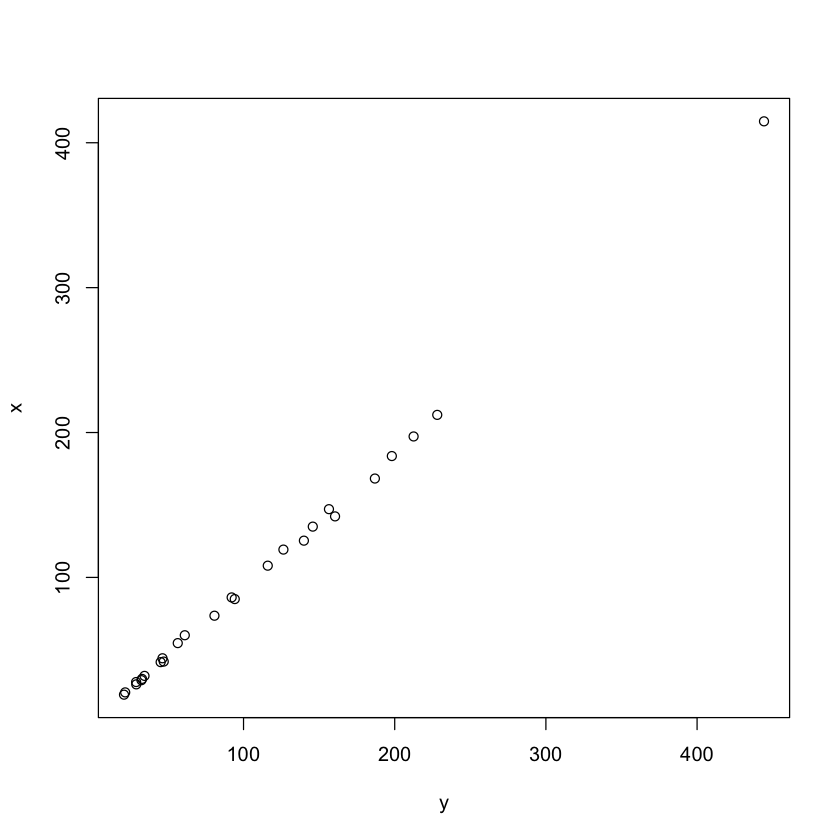

In [22]:
## Example 2: Example 5.4  ######################################
source("Code/ci.r")
source("Code/srs.r")
source("Code/ratio.r")
source("Code/deff.r")

########## Input data  ########################################
mydata=read.csv("Data/salary.csv")
print(mydata)

y.sample=mydata$y
x.sample=mydata$x

N=687
Xbar=70523.16/N
alpha=0.05

######### plot #####################################
plot(mydata)
######### data analysis  ###########################
##Mean##
mean.simple.result=srs.mean(N, y.sample, alpha)
print(mean.simple.result)

mean.ratio.result=ratio.mean(y.sample, x.sample, N, Xbar, alpha)
print(mean.ratio.result)

var.result=c(mean.simple.result$ybar.var, mean.ratio.result$ybarR.var)
deff.result=deff(var.result)
rownames(deff.result)=c("Simple", "Ratio")
print(deff.result)
####################################
##Total##
total.simple.result=srs.total(N, y.sample, alpha)
print(total.simple.result)

total.ratio.result=ratio.total(y.sample, x.sample, N, Xbar, alpha)
print(total.ratio.result)

var.result=c(total.simple.result$ytot.var, total.ratio.result$ytotal.var)
deff.result=deff(var.result)
rownames(deff.result)=c("Simple", "Ratio")
print(deff.result)

### 5.7

In [23]:
## Example 4: Exercise 5.7  ######################################
source("Code/ci.r")
source("Code/srs.r")
source("Code/srs size.r")
source("Code/ratio.r")
source("Code/deff.r")

########## Input data  #########################################
mydata=read.csv("Data/rabit.csv")
print(mydata)

y.sample=mydata$y
x.sample=mydata$x

N=100
Xbar=3.1
alpha=0.05


######### data analysis  ###########################
mean.simple.result=srs.mean(N, y.sample, alpha)
print(mean.simple.result)

mean.ratio.result=ratio.mean(y.sample, x.sample, N, Xbar, alpha)
print(mean.ratio.result)

var.result=c(mean.simple.result$ybar.var, mean.ratio.result$ybarR.var)
deff.result=deff(var.result)
print(deff.result)

n.simple=size.mean(N, Mean.his=NULL, Var.his=var(y.sample), method="d", bound=0.05, alpha)$size
size.result=deff.size(deff.result, n.simple)

rownames(size.result)=c("Simple", "Ratio")
print(size.result)

     x   y
1  3.2 4.1
2  3.0 4.0
3  2.9 4.1
4  2.8 3.9
5  2.8 3.7
6  3.1 4.1
7  3.0 4.2
8  3.2 4.1
9  2.9 3.9
10 2.8 3.8
$ybar
[1] 3.99

$ybar.var
[1] 0.00229

$ybar.sd
[1] 0.04785394

$d
[1] 0.09379201

$r
[1] 0.02350677

$left
[1] 3.896208

$right
[1] 4.083792

$ybarR.est
[1] 4.164646

$ybarR.var
[1] 0.001791572

$ybarR.sd
[1] 0.04232697

$ybarR.ci
            Left    Right
Classic 4.081687 4.247606
Exact   4.079752 4.253052
Exact2  4.078056 4.251237

      Var    Deff
1 0.00229 1.00000
2 0.00179 0.78235
           Var    Deff Size
Simple 0.00229 1.00000   28
Ratio  0.00179 0.78235   22


### 5.6

In [25]:
## Example 5: Example 5.6  ######################################
source("Code/ci.r")
source("Code/srs.r")
source("Code/ratio.r")
source("Code/regression.r")
source("Code/deff.r")

########## Input data  #########################################
mydata=read.csv("Data/salary.csv")
print(mydata)

y.sample=mydata$y
x.sample=mydata$x

N=687
Xbar=70523.16/N
alpha=0.05

######### data analysis  #######################################################
total.simple.reult=srs.total(N, y.sample, alpha)
print(total.simple.reult)

total.ratio.result=ratio.total(y.sample, x.sample, N, Xbar, alpha)
print(total.ratio.result)

total.reg.result=regression.total(y.sample, x.sample, N, Xbar, alpha, method="Min", beta0=NULL)
print(total.reg.result)

var.result=c(total.simple.reult$ytot.var, total.ratio.result$ytotal.var, total.reg.result$Var)
deff.result=deff(var.result)
rownames(deff.result)=c("Simple", "Ratio", "Regression")
print(deff.result)

          y        x
1   29.0495  26.1769
2  139.9255 125.3676
3   47.2185  41.9142
4  198.0972 183.7596
5  126.3799 119.2068
6  212.4932 197.2859
7   20.9364  19.0702
8  444.2654 414.7834
9  186.8868 168.2433
10  46.4005  44.1883
11  61.1413  60.0888
12  92.1404  86.1894
13 228.1358 212.1831
14  56.4891  54.6552
15  80.7615  73.5656
16  32.4696  29.0705
17  28.9558  27.7823
18  94.1935  85.0493
19 116.0222 108.1006
20 160.5326 142.1185
21  34.4977  32.0346
22 156.5069 147.1044
23 145.8097 135.0568
24  21.7273  20.6458
25  45.1746  41.5258
26  32.8473  29.9548
$ytot.est
[1] 75016.65

$ytot.var
[1] 155389588

$ytot.sd
[1] 12465.54

$d
[1] 24432

$r
[1] 0.3256877

$left
[1] 50584.65

$right
[1] 99448.65

$ytotal.est
[1] 76270.5

$ytotal.var
[1] 114339.6

$ytotal.sd
[1] 338.1414

$ytotal.ci
            Left    Right
Classic 75607.76 76933.25
Exact   75599.08 77027.76
Exact2  75596.68 76944.33

               Est      Var       SD     Left    Right
Total_Reg 76264.62 115502.8 339.8571 7559

### 5.7

In [26]:
## Example 6: Exercise 5.7  ######################################

########## Input data  #########################################
mydata=read.csv("Data/rabit.csv")
print(mydata)

y.sample=mydata$y
x.sample=mydata$x

N=100
Xbar=3.1
alpha=0.05

######### data analysis  #######################################################
mean.simple.result=srs.mean(N, y.sample, alpha)
print(mean.simple.result)

mean.reg.result=regression.mean(y.sample, x.sample, N, Xbar, alpha, method="Min", beta0=NULL)
print(mean.reg.result)

var.result=c(mean.simple.result$ybar.var, mean.reg.result$Var)
deff.result=deff(var.result)

n.simple=size.mean(N, Mean.his=NULL, Var.his=var(y.sample), method="d", bound=0.05, alpha)$size
size.result=deff.size(deff.result, n.simple)

rownames(size.result)=c("SRS", "Reg")
print(size.result)

     x   y
1  3.2 4.1
2  3.0 4.0
3  2.9 4.1
4  2.8 3.9
5  2.8 3.7
6  3.1 4.1
7  3.0 4.2
8  3.2 4.1
9  2.9 3.9
10 2.8 3.8
$ybar
[1] 3.99

$ybar.var
[1] 0.00229

$ybar.sd
[1] 0.04785394

$d
[1] 0.09379201

$r
[1] 0.02350677

$left
[1] 3.896208

$right
[1] 4.083792

              Est         Var         SD    Left   Right
Mean_Reg 4.088235 0.001156561 0.03400825 4.02158 4.15489
        Var    Deff Size
SRS 0.00229 1.00000   28
Reg 0.00116 0.50505   14


# Chapter 6.2 Stratified Ratio and Regression
### Stratified: Separate Ratio Estimation of Population Mean $\bar Y$›

1. **Estimator for the Population Mean**
 $$
   \bar{y}_{RS} = \sum_h W_h \bar{y}_{Rh} = \sum_h W_h \left( \frac{\bar{y}_h}{\bar{x}_h}  \cdot \bar{X}_h\right)
   $$
   >Notice that $$\bar y_{Rh} =   \frac{\bar{y}_h}{\bar{x}_h}  \cdot \bar{X}_h$$ is the ratio estimator of the $ h $-th stratum.

2. **Approximate Unbiasedness**
 $$
   E(\bar{y}_{RS}) \approx \bar{Y} \quad (\text{AUE})
   $$

3. **Variance of the Estimator**
 $$
   \text{Var}(\bar{y}_{RS}) \approx \sum_h W_h^2 \frac{1-f_h}{n_h} \left( S_{y_h}^2 + R_h^2 S_{x_h}^2 - 2R_h S_{yxh} \right)
   $$

4. **Estimated Variance of the Estimator**
 $$
   \widehat{\text{Var}}(\bar{y}_{RS}) \approx \sum_h W_h^2 \frac{1-f_h}{n_h} \left( s_{y_h}^2 + \hat{R}_h^2 s_{x_h}^2 - 2\hat{R}_h s_{yxh} \right)
   $$
 where $ \hat{R}_h = \frac{\bar{y}_h}{\bar{x}_h} $

In [ ]:
separate.ratio.mean=function(Nh, y.sample, x.sample, stra.index, Xbarh, alpha)
{
  stra.num=length(Nh)
  Wh=Nh/sum(Nh)

  yh.est  =rep(0, stra.num)
  yh.var  =rep(0, stra.num)
  yh.sd   =rep(0, stra.num)
  yh.left =rep(0, stra.num)
  yh.right=rep(0, stra.num)
  
  for (h in 1:stra.num)
  {
    y.hth=y.sample[stra.index==h]
    x.hth=x.sample[stra.index==h]
    stra.ratio=ratio.mean(y.hth, x.hth, Nh[h], Xbarh[h], alpha)
    
    yh.est[h]  =stra.ratio$ybarR.est
    yh.var[h]  =stra.ratio$ybarR.var
    yh.sd[h]   =stra.ratio$ybarR.sd
    
    yh.ci      =stra.ratio$ybarR.ci
    yh.ci.left =yh.ci$Left
    yh.ci.right=yh.ci$Right
    yh.left[h] =yh.ci.left[1]
    yh.right[h]=yh.ci.right[1]
  }
  stra.result=cbind(Nh, Wh, yh.est, yh.var, yh.sd, yh.left, yh.right)
  
  yRS.est=sum(Wh*yh.est)
  yRS.var=sum(Wh^2*yh.var)
  yRS.sd =sqrt(yRS.var)
  
  yRS.ci=conf.interval(yRS.est, yRS.sd, alpha)
  yRS.left =yRS.ci$left
  yRS.right=yRS.ci$right
  
  yRS.result=matrix(c(yRS.est, yRS.var, yRS.sd, yRS.left, yRS.right), nrow=1)
  colnames(yRS.result)=c("Est", "Var", "SD", "Left", "Right")
  rownames(yRS.result)="Mean_RS"
  return(list(stra.result=as.data.frame(stra.result), yRS.result=as.data.frame(yRS.result)))
}


separate.ratio.total=function(Nh, y.sample, x.sample, stra.index, Xbarh, alpha)
{
  N=sum(Nh)
  Wh=Nh/sum(Nh)
  
  mean.RS.result=separate.ratio.mean(Nh, y.sample, x.sample, stra.index, Xbarh, alpha)
  RS.stra=mean.RS.result$stra.result
  RS.mean=mean.RS.result$yRS.result
  
  yh.totR.est  =Nh*RS.stra$yh.est
  yh.totR.var  =Nh^2*RS.stra$yh.var
  yh.totR.sd   =sqrt(yh.totR.var)
  yh.totR.left =Nh*RS.stra$yh.left
  yh.totR.right=Nh*RS.stra$yh.right

  stra.result=cbind(Nh, Wh, yh.totR.est, yh.totR.var, yh.totR.sd, yh.totR.left, yh.totR.right)
  
  ytot.RS.est  =N*RS.mean$Est             
  ytot.RS.var  =N^2*RS.mean$Var
  ytot.RS.sd   =sqrt(ytot.RS.var)
  ytot.RS.left =N*RS.mean$Left
  ytot.RS.right=N*RS.mean$Right
  
  ytot.RS.result=matrix(c(ytot.RS.est, ytot.RS.var, ytot.RS.sd, ytot.RS.left, ytot.RS.right), nrow=1)
  colnames(ytot.RS.result)=c("Est", "Var", "SD", "Left", "Right")
  rownames(ytot.RS.result)="TOTAL_RS"
  return(list(stra.result=as.data.frame(stra.result), ytot.RS.result=as.data.frame(ytot.RS.result)))
}

### Stratified: Combined Ratio Estimation of Population Mean $\bar Y$

1. **Estimator for the Population Mean**  
 $$
   \bar{y}_{RC} = \frac{\bar{y}_{st}}{\bar{x}_{st}} \cdot \bar{X} = \hat{R}_c \cdot \bar{X}
   $$

2. **Approximate Unbiasedness**  
 $$
   E(\bar{y}_{RC}) \approx \bar{Y} \quad (\text{AUE})
   $$

3. **Variance of the Estimator**  
 $$
   \text{Var}(\bar{y}_{RC}) = \sum_h W_h^2 \frac{1-f_h}{n_h} \left( S_{y_h}^2 + R_h^2 S_{x_h}^2 - 2R_h S_{yx_h} \right)
   $$

4. **Estimated Variance of the Estimator**  
 $$
   \widehat{\text{Var}}(\bar{y}_{RC}) = \sum_h W_h^2 \frac{1-f_h}{n_h} \left( s_{y_h}^2 + \hat{R}_c^2 s_{x_h}^2 - 2\hat{R}_c s_{yx_h} \right)
   $$
 where:
 $$
   \hat{R}_c = \frac{\bar{y}_{st}}{\bar{x}_{st}}
   $$

In [ ]:
combined.ratio.mean=function(Nh, y.sample, x.sample, stra.index, Xbar, alpha)
{
  yst.result=stra.srs.mean2(Nh, y.sample, stra.index, alpha)$mean.result
  xst.result=stra.srs.mean2(Nh, x.sample, stra.index, alpha)$mean.result
  
  ratio.est=yst.result$mean.est/xst.result$mean.est
  yRC.est=Xbar*ratio.est
  
  stra.num=length(Nh)
  Wh=Nh/sum(Nh)
  
  nh  =rep(0, stra.num)
  sy2 =rep(0, stra.num)
  sx2 =rep(0, stra.num)
  syx =rep(0, stra.num)

  for (h in 1:stra.num)
  {
  y.hth=y.sample[stra.index==h]
  x.hth=x.sample[stra.index==h]
    
  nh[h]=length(y.hth)

  sy2[h] =var(y.hth)
  sx2[h] =var(x.hth)
  syx[h]=cov(y.hth, x.hth)
  }
  
  fh=nh/Nh
  nf=(1-fh)/nh
  
  stra.result=cbind(Nh, Wh, nh, fh)
  
  yRC.var=sum(Wh^2*nf*(sy2+ratio.est^2*sx2-2*ratio.est*syx))
  yRC.sd =sqrt(yRC.var)

  yRC.ci=conf.interval(yRC.est, yRC.sd, alpha)
  yRC.left =yRC.ci$left
  yRC.right=yRC.ci$right
  
  yRC.result=matrix(c(yRC.est, yRC.var, yRC.sd, yRC.left, yRC.right), nrow=1)
  colnames(yRC.result)=c("Est", "Var", "SD", "Left", "Right")
  rownames(yRC.result)=c("Mean_RC")
  return(list(stra.result=as.data.frame(stra.result), yRC.result=as.data.frame(yRC.result)))
}


combined.ratio.total=function(Nh, y.sample, x.sample, stra.index, Xbar, alpha)
{
  N=sum(Nh)

  mean.RC.result=combined.ratio.mean(Nh, y.sample, x.sample, stra.index, Xbar, alpha)
  RC.stra=mean.RC.result$stra.result
  RC.mean=mean.RC.result$yRC.result
  
  ytot.RC.est  =N*RC.mean$Est             
  ytot.RC.var  =N^2*RC.mean$Var
  ytot.RC.sd   =sqrt(ytot.RC.var)
  ytot.RC.left =N*RC.mean$Left
  ytot.RC.right=N*RC.mean$Right
  
  ytot.RC.result=matrix(c(ytot.RC.est, ytot.RC.var, ytot.RC.sd, ytot.RC.left, ytot.RC.right), nrow=1)
  colnames(ytot.RC.result)=c("Est", "Var", "SD", "Left", "Right")
  rownames(ytot.RC.result)=c("TOTAL_RC")
  return(list(stra.result=as.data.frame(RC.stra), ytot.RC.result=as.data.frame(ytot.RC.result)))
}

### Separate Regression Estimation of Population Mean $\bar Y$

#### Case I: When $\beta_h$ is constant
1. **Estimator for the Population Mean**  
 $$
   \bar{y}_{lrS} = \sum_hW_h \bar y_{lrh }=\sum_h W_h \left( \bar{y}_h + \beta_h (\bar{X}_h - \bar{x}_h) \right)
   $$
   > Notice that $$\bar y_{lrh} = \bar{y}_h + \beta_h (\bar{X}_h - \bar{x}_h)$$ is the regression estimator of the $ h $-th stratum.
2. **Unbiasedness**  
 $$
   E(\bar{y}_{lrS}) = \bar{Y} \quad (\text{UE})
   $$

3. **Variance of the Estimator**  
 $$
 \text{Var}(\bar{y}_{lrS}) = \sum_h W_h^2 \frac{1-f_h}{n_h} \left( S_{y_h}^2 + \beta_h^2 S_{x_h}^2 - 2\beta_h S_{yx_h} \right)
 $$

   > **Minimum Variance Condition**  
      >When $ \beta_h = B_h = \frac{S_{yx_h}}{S_{x_h}^2} $:  
      >$$
      >\text{Var}_{\text{min}} = \sum_h W_h^2 \frac{1-f_h}{n_h} S_{eh}^2
      >$$
      >where:
      >$$
      >S_{eh}^2 = S_{y_h}^2 (1 - \rho_h^2)
      >$$

4. **Estimated Variance of the Estimator**  
 $$
   \widehat{\text{Var}}(\bar{y}_{lrS}) = \sum_h W_h^2 \frac{1-f_h}{n_h} \left( s_{y_h}^2 + \hat{\beta}_h^2 s_{x_h}^2 - 2\hat{\beta}_h s_{yx_h} \right)
   $$

---

#### Case II: When $ \beta_h = \hat{b}_h = \frac{S_{yx_h} }{S_{x_h}^2} $ (Regression Coefficient)

1. Estimator for the Population Mean
 $$
   \bar{y}_{lrS} = \sum_h W_h \left( \bar{y}_h + \hat{b}_h (\bar{X}_h - \bar{x}_h) \right)
   $$

2. **Asymptotically Unbiased Estimator**  
 $$
   E(\bar{y}_{lrS}) \approx \bar{Y} \quad (\text{AUE})
   $$

3. **Variance of the Estimator**  
 $$
   \text{Var}(\bar{y}_{lrS}) \approx \sum_h W_h^2 \frac{1-f_h}{n_h} S_{y_h}^2 (1 - \rho_h^2)
   $$

4. **Estimated Variance of the Estimator**  
 $$
   \widehat{\text{Var}}(\bar{y}_{lrS}) \approx \sum_h W_h^2 \frac{1-f_h}{n_h} \frac{n_h-1}{n_h-2} \left( s_{y_h}^2 - \frac{s_{yx_h}}{s_{x_h}^2} \right)^2
   $$

In [ ]:
# Write this as homework
seperate.regression.mean=function(Nh, y.sample, x.sample, stra.index, Xbarh, alpha, method = "Min", beta0 = NULL)
{
    ## Your Code Here
    return(list(stra.result=as.data.frame(stra.result), ylrS.result=as.data.frame(ylrS.result)))
}
seperate.regression.total = function(Nh, y.sample, x.sample, stra.index, Xbarh, alpha, method = "Min", beta0 = NULL)
{
    ## Your Code Here
    return(list(stra.result = as.data.frame(stra.result), YlrS.result = as.data.frame(Ytotal.result)))
}

### Combined Regression Estimation of Population Mean $\bar Y$


#### Case I: When $\beta$ is constant

1. **Estimator for the Population Mean**  
 $$
   \bar{y}_{lrC} = \bar{y}_{st} + \beta (\bar{X} - \bar{x}_{st})
   $$

2. **Unbiasedness**  
 $$
   E(\bar{y}_{lrC}) = \bar{Y} \quad (\text{UE})
   $$

3. **Variance of the Estimator**  
 $$
   \text{Var}(\bar{y}_{lrC}) = \sum_h W_h^2 \frac{1-f_h}{n_h} \left( S_{yh}^2 + \beta^2 S_{xh}^2 - 2\beta S_{yxh} \right)
   $$

   >**Minimum Variance Condition**  
      >When $$ \beta = B_c = \frac{\sum_h W_h^2 \frac{1-f_h}{n_h} S_{yxh}}{\sum_h W_h^2 \frac{1-f_h}{n_h} S_{xh}^2} $$ 
      >
      >The Variance achieves its minimum.

5. **Estimated Variance of the Estimator**  
 $$
   \widehat{\text{Var}}(\bar{y}_{lrC}) = \sum_h W_h^2 \frac{1-f_h}{n_h} \left( s_{yh}^2 + \hat{\beta}^2 s_{xh}^2 - 2\hat{\beta} s_{yxh} \right)
   $$

---

#### Case II 
**When** $$ \beta = \hat{b}_c = \frac{\sum_h W_h^2 \frac{1-f_h}{n_h} S_{yx_h}}{\sum_h W_h^2 \frac{1-f_h}{n_h} S_{x_h}^2} $$  
1. **Estimator for the Population Mean**  
 $$
   \bar{y}_{lrC} = \bar{y}_{st} + \hat{b}_c (\bar{X} - \bar{x}_{st})
   $$

2. **Approximate Unbiasedness**  
 $$
   E(\bar{y}_{lrC}) \approx \bar{Y} \quad (\text{AUE})
   $$

3. **Variance of the Estimator**  
 $$
   \text{Var}(\bar{y}_{lrC}) \approx \sum_h W_h^2 \frac{1-f_h}{n_h} \left( S_{y_h}^2 + B_c^2 S_{x_h}^2 - 2B_c S_{yx_h} \right)
   $$

4. **Estimated Variance of the Estimator**  
 $$
   \widehat{\text{Var}}(\bar{y}_{lrC}) \approx \sum_h W_h^2 \frac{1-f_h}{n_h} \left( s_{y_h}^2 + \hat{b}_c^2 s_{x_h}^2 - 2\hat{b}_c s_{yx_h} \right)
   $$

In [ ]:
combined.regression.mean = function(Nh, y.sample, x.sample, stra.index, Xbar, alpha, method = "Min", beta0 = NULL){
    ## Your Code Here
    return(list(stra.result = as.data.frame(stra.result), ybar.lrC.result = as.data.frame(ybar.lrC.result)))
}

combined.regression.total = function(Nh, y.sample, x.sample, stra.index, Xbar, alpha, method = "Min", beta0 = NULL){
    ## Your Code Here
    return(list(stra.result = as.data.frame(stra.result), Ytotal.lrC.result = as.data.frame(Ytotal.lrC.result)))
}

## Examples
### 5.7

In [27]:
## Example 7: Example 5.7  ######################################
source("Code/ci.r")
source("Code/srs.r")
source("Code/srs size.r")
source("Code/ratio.r")
source("Code/regression.r")
source("Code/stra srs.r")
source("Code/stra size.r")
source("Code/stra ratio.r")
source("Code/deff.r")
source("Code/stra regression.r")
source("Code/stra diff.r")

########## Input data  #########################################
mydata=read.csv("Data/staff.csv")
print(mydata)

y.sample  =mydata$y
x.sample  =mydata$x
stra.index=mydata$stra.index

Nh=c(135, 1228)
Xbarh=c(75650/135, 315612/1228)
Xbar=sum(Xbarh*Nh)/sum(Nh)
alpha=0.05


######### data analysis  #######################################################
total.SS.result=stra.srs.total2(Nh, y.sample, stra.index, alpha)
SS.stra=total.SS.result$stra.result
SS.total=total.SS.result$total.result
print(total.SS.result)

total.RS.result=separate.ratio.total(Nh, y.sample, x.sample, stra.index, Xbarh, alpha)
RS.stra=total.RS.result$stra.result
RS.total=total.RS.result$yRS.result
print(total.RS.result)

total.RC.result=combined.ratio.total(Nh, y.sample, x.sample, stra.index, Xbar, alpha)
RC.stra=total.RC.result$stra.result
RC.total=total.RC.result$ytot.RC.result
print(total.RC.result)

#seperate linear regression
total.slr.result = seperate.regression.total(Nh, y.sample, x.sample, stra.index, Xbarh, alpha,beta0 = 1.027)

print(total.slr.result)
SLR.total=total.slr.result$YReS.result

# combined linear regression
total.clr.result = combined.regression.total(Nh, y.sample, x.sample, stra.index, Xbar, alpha)
print(total.clr.result)
CLR.total = total.clr.result$ytot.RegC.result

# difference esimator
total.diff.result = diff.total(Nh, y.sample, x.sample, stra.index, Xbar, alpha)
print(total.diff.result)

var.result=c(SS.total$total.var, RS.total$Var, RC.total$Var)
deff.result=deff(var.result)
rownames(deff.result)=c("Stra Simple", "Sperate Ratio", "Combined Ratio")
print(deff.result)

      x    y stra.index
1   215  224          1
2  1082 1110          1
3   675  714          1
4   382  393          1
5   180  189          1
6   632  677          1
7    56   61          1
8   812  828          1
9    98  101          1
10  217  228          1
11 2158 2220          1
12  318  334          1
13  457  461          1
14  234  248          1
15  465  472          1
16   87   94          2
17  123  132          2
18   59   62          2
19   14   17          2
20  657  702          2
21   83   88          2
22  208  227          2
23   42   45          2
24   38   42          2
25  148  165          2
26  390  429          2
27   97  104          2
28  103  107          2
29  284  290          2
30  125  125          2
31  674  714          2
32  357  385          2
33  218  234          2
34  819  868          2
35  146  162          2
$stra.result
    Nh         Wh   yh.est    yh.var     yh.sd  yh.left yh.right
1  135 0.09904622 550.6667 17694.473 133.02057 289.9511 81

ERROR: Error in `.rowNamesDF<-`(x, value = value): invalid 'row.names' length


# Chapter 7 Two Phase Sampling
## Functions
### Double Stratified Sampling Estimation of Population Mean $ \bar{Y}$
1. **Estimator for the Population Mean**:
 $$
   \bar{y}_{stD} = \sum_{h=1}^{L} w_h' \cdot \bar{y}_h
   $$

2. **Unbiased Estimation**:
 $$
   E(\bar{y}_{stD}) = \bar{Y} \quad (\text{UE})
   $$

3. **Variance of the Estimator**:
 $$
   \text{Var}(\bar{y}_{stD}) = \left( \frac{1}{n'} - \frac{1}{N} \right) S^2 + \sum_{h=1}^{L} \frac{1}{n_h'} (v_h' - 1) w_h' S_h^2
   $$

4. **Estimated Variance of the Estimator**:
 $$
   \widehat{\text{Var}}(\bar{y}_{stD}) = \sum_{h=1}^{L} \left( \frac{1}{n_h} - \frac{1}{n_h'} \right) w_h' s_h^2 + \left( \frac{1}{n'} - \frac{1}{N} \right) \sum_{h=1}^{L} w_h' \left( \bar{y}_h - \bar{y}_{stD} \right)^2
   $$

In [ ]:
twophase.stra.mean1=function(N=NULL, nh.1st, nh.2nd, ybarh, s2h, alpha)
{
  N.inv=ifelse(is.null(N), 0, 1/N)
  n.1st=sum(nh.1st)
  wh.1st=nh.1st/n.1st
  
  ybar.stD.est=sum(wh.1st*ybarh)
  
  ybar.stD.var1=(1/n.1st-N.inv)*sum(wh.1st*(ybarh-ybar.stD.est)^2)
  ybar.stD.var2=sum((1/nh.2nd-1/nh.1st)*wh.1st^2*s2h)
  ybar.stD.var =ybar.stD.var1+ybar.stD.var2
                
  ybar.stD.sd =sqrt(ybar.stD.var)
  
  ci.result=conf.interval(ybar.stD.est, ybar.stD.sd, alpha)
  ybar.stD.left =ci.result$left
  ybar.stD.right=ci.result$right
  
  mean.result=matrix(c(ybar.stD.est, ybar.stD.var, ybar.stD.sd, ybar.stD.left, ybar.stD.right), nrow=1)
  colnames(mean.result)=c("Est", "Var", "SD", "Left", "Right")
  rownames(mean.result)="stD_Mean"
  return(mean.result=as.data.frame(mean.result))
}

In [ ]:

twophase.stra.total1=function(N, nh.1st, nh.2nd, ybarh, s2h, alpha)
{
  ybar.stD.result=twophase.stra.mean1(N, nh.1st, nh.2nd, ybarh, s2h, alpha)
  ybar.stD.est  =ybar.stD.result$Est
  ybar.stD.var  =ybar.stD.result$Var
  ybar.stD.left =ybar.stD.result$Left
  ybar.stD.right=ybar.stD.result$Right
  
  ytot.stD.est  =N*ybar.stD.est              
  ytot.stD.var  =N^2*ybar.stD.var
  ytot.stD.sd   =sqrt(ytot.stD.var)
  ytot.stD.left =N*ybar.stD.left
  ytot.stD.right=N*ybar.stD.right
  
  total.result=matrix(c(ytot.stD.est, ytot.stD.var, ytot.stD.sd, ytot.stD.left, ytot.stD.right), nrow=1)
  colnames(total.result)=c("Est", "Var", "SD", "Left", "Right")
  rownames(total.result)="stD_Total"
  return(total.result=as.data.frame(total.result))
}

### Double Ratio Estimation of Population Mean $ \bar{Y}$
1. **Estimator for the Population Mean**:
 $$
   \bar{y}_{RD} = \hat{R} \cdot \bar{x}' = \frac{\bar{y}'}{\bar{x}'} \cdot \bar{x}'
   $$

2. **Asymptotically Unbiased Estimation**:
 $$
   E(\bar{y}_{RD}) {\approx} \bar{Y}\quad \text{AUE}
   $$

3. **Variance of the Estimator**:
 $$
   \text{Var}(\bar{y}_{RD}) = \left( \frac{1}{n'} - \frac{1}{N} \right) S_y^2 + \left( \frac{1}{n} - \frac{1}{n'} \right) (S_y^2 + R^2 S_x^2 - 2RS_{yx})
   $$

4. **Estimated Variance of the Estimator**:
 $$
   \widehat{\text{Var}}(\bar{y}_{RD}) = \left( \frac{1}{n'} - \frac{1}{N} \right) s_y^2 + \left( \frac{1}{n} - \frac{1}{n'} \right) \left( s_y^2 + \hat{R}^2 s_x^2 - 2\hat{R}s_{yx} \right)
   $$

In [ ]:
twophase.ratio.mean=function(N=NULL, n.1st, xbar.1st, y.sample, x.sample, alpha)
{ 
  N.inv=ifelse(is.null(N), 0, 1/N)  # Inverse of population size
  n.2nd=length(y.sample)  # Sample size of the second phase

  ybar=mean(y.sample)  # Mean of the study variable
  xbar=mean(x.sample)  # Mean of the auxiliary variable
  
  sy2 =var(y.sample)  # Variance of the study variable
  sx2 =var(x.sample)  # Variance of the auxiliary variable
  syx =cov(y.sample, x.sample)  # Covariance between study and auxiliary variables
  
  ratio.est=ybar/xbar  # Ratio estimator
  
  ybar.RD.est=xbar.1st*ratio.est  # Estimated mean using ratio estimator
  
  # Variance components for the estimated mean
  ybar.RD.var1=(1/n.1st-N.inv)*sy2
  ybar.RD.var2=(1/n.2nd-1/n.1st)*(sy2+ratio.est^2*sx2-2*ratio.est*syx)
  ybar.RD.var =ybar.RD.var1+ybar.RD.var2
  
  ybar.RD.sd=sqrt(ybar.RD.var)  # Standard deviation of the estimated mean
  
  # Confidence interval for the estimated mean
  ci.result=conf.interval(ybar.RD.est, ybar.RD.sd, alpha)
  ybar.RD.left =ci.result$left
  ybar.RD.right=ci.result$right
  
  # Result matrix for the estimated mean
  mean.result=matrix(c(ybar.RD.est, ybar.RD.var, ybar.RD.sd, ybar.RD.left, ybar.RD.right), nrow=1)
  colnames(mean.result)=c("Est", "Var", "SD", "Left", "Right")
  rownames(mean.result)="RD_Mean"
  return(mean.result=as.data.frame(mean.result))
}


In [ ]:
twophase.ratio.total=function(N, n.1st, xbar.1st, y.sample, x.sample, alpha)
{
  ybar.RD.result=twophase.ratio.mean(N, n.1st, xbar.1st, y.sample, x.sample, alpha)  # Call mean estimator
  ybar.RD.est  =ybar.RD.result$Est
  ybar.RD.var  =ybar.RD.result$Var
  ybar.RD.left =ybar.RD.result$Left
  ybar.RD.right=ybar.RD.result$Right
  
  # Calculate total estimates based on mean estimates
  ytot.RD.est  =N*ybar.RD.est              
  ytot.RD.var  =N^2*ybar.RD.var
  ytot.RD.sd   =sqrt(ytot.RD.var)
  ytot.RD.left =N*ybar.RD.left
  ytot.RD.right=N*ybar.RD.right
  
  # Result matrix for the estimated total
  total.result=matrix(c(ytot.RD.est, ytot.RD.var, ytot.RD.sd, ytot.RD.left, ytot.RD.right), nrow=1)
  colnames(total.result)=c("Est", "Var", "SD", "Left", "Right")
  rownames(total.result)="RD_Total"
  return(total.result=as.data.frame(total.result))
}

### Double Regression Estimation of Population Mean $ \bar{Y}$

#### Case 1: When $ \beta $ is a Constant ($ \beta = \beta_0 $, i.e., $ \beta = 1 $)

1. **Estimator for the Population Mean**:
 $$
   \bar{y}_{lrD} = \bar{y} + \beta (\bar{x}' - \bar{x})
   $$

2. **Unbiasedness**:
 $$
   E(\bar{y}_{lrD}(\beta_0)) = \bar{Y} \quad (\text{UE})
   $$

3. **Variance of the Estimator**:
 $$
   \text{Var}(\bar{y}_{lrD}(\beta_0)) = \left( \frac{1}{n'} - \frac{1}{N} \right) S_y^2 + \left( \frac{1}{n} - \frac{1}{n'} \right) \left( S_y^2 + \beta_0^2 S_x^2 - 2\beta_0 S_{yx} \right)
   $$

4. **Estimated Variance of the Estimator**:
 $$
   \widehat{\text{Var}}(\bar{y}_{lrD}(\beta_0)) = \left( \frac{1}{n'} - \frac{1}{N} \right) s_y^2 + \left( \frac{1}{n} - \frac{1}{n'} \right) \left( s_y^2 + {\beta}_0^2 s_x^2 - 2{\beta}_0 s_{yx} \right)
   $$

Here is the Markdown representation of the given mathematical expressions:

---

#### Case II: When $ \beta$ is the regression coefficient of the second-phase sample
$$ \beta = \hat{b} = \frac{S_{yx}}{S_x^2}$$ 

1. **Estimator for the Population Mean**
 $$
   \bar{y}_{lrD} = \bar{y} + \hat{b} (\bar{x}' - \bar{x})
   $$
2. **Asymptotically Unbiased Estimation**
 $$
   E(\bar{y}_{lrD}) \approx \bar{Y} \quad (\text{AUE})
   $$

3. **Variance of the Estimator**
 $$
   \text{Var}(\bar{y}_{lrD}) = \left( \frac{1}{n'} - \frac{1}{N} \right) S_y^2 + \left( \frac{1}{n} - \frac{1}{n'} \right) S_y^2 (1 - \rho^2)
   $$

4. **Estimated Variance of the Estimator**
 $$
   \widehat{\text{Var}}(\bar{y}_{lrD}) = \left( \frac{1}{n'} - \frac{1}{N} \right) s_y^2 + \left( \frac{1}{n} - \frac{1}{n'} \right) s_e^2
   $$
 where:
 $$
   s_e^2 = \frac{n-1}{n-2} \left( s_y^2 - \frac{s_{yx}^2}{s_x^2} \right)
   $$

In [ ]:
twophase.regression.mean=function(N=NULL, n.1st, xbar.1st, y.sample, x.sample, alpha, beta0=NULL)
{
  N.inv=ifelse(is.null(N), 0, 1/N)  # Inverse of population size
  n.2nd=length(y.sample)  # Sample size of the second phase

  ybar=mean(y.sample)  # Mean of the study variable
  xbar=mean(x.sample)  # Mean of the auxiliary variable
  sy2 =var(y.sample)  # Variance of the study variable
  sx2 =var(x.sample)  # Variance of the auxiliary variable
  syx =cov(y.sample, x.sample)  # Covariance between study and auxiliary variables          
  if (!is.null(beta0))
{
  ybar.lrD.est = ybar +beta0*(xbar.1st-xbar)  # Linear regression estimator

  ybar.lrD.var1 = (1/n.1st - N.inv)*sy2
  ybar.lrD.var2 = (1/n.2nd - 1/n.1st)*(sy2 + beta0^2*sx2 - 2*beta0*syx)
  ybar.lrD.var = ybar.lrD.var1 + ybar.lrD.var2  # Variance of the linear regression estimator
  ybar.lrD.sd =sqrt(ybar.lrD.var)  # Standard deviation of the linear regression estimator
}
  else
  {
    beta=syx/sx2  # Slope of the linear regression line
    ybar.lrD.est = ybar +beta*(xbar.1st-xbar)  # Linear regression estimator

    se2 = (n.2nd -1)/(n.2nd -2)*(sy2 - (syx/sx2))
    ybar.lrD.var1 = (1/n.1st - N.inv)*sy2
    ybar.lrD.var2 = (1/n.2nd - 1/n.1st)*se2
    ybar.lrD.var = ybar.lrD.var1 + ybar.lrD.var2  # Variance of the linear regression estimator
    ybar.lrD.sd =sqrt(ybar.lrD.var)  # Standard deviation of the linear regression estimator    
  }
  ci.result =conf.interval(ybar.lrD.est, ybar.lrD.sd, alpha)  # Confidence interval for the linear regression estimator
  ybar.lrD.left =ci.result$left  # Left endpoint of the confidence interval
  ybar.lrD.right=ci.result$right  # Right endpoint of the confidence interval
  mean.result = matrix(c(ybar.lrD.est, ybar.lrD.var, ybar.lrD.sd, ybar.lrD.left, ybar.lrD.right), nrow=1)  # Matrix containing the results of the linear regression estimator
  colnames(mean.result)=c("Est", "Var", "SD", "Left", "Right")  # Column names for the matrix
  rownames(mean.result)=c("lrD_Mean")  # Row name for the matrix
  return(mean.result = as.data.frame(mean.result))  # Return the results of the linear regression estimator
}

In [ ]:
twophase.regression.total = function(N, n.1st, xbar.1st, y.sample, x.sample, alpha, beta0=NULL)
{
  result = twophase.regression.mean(N, n.1st, xbar.1st, y.sample, x.sample, alpha, beta0)
  ybar.lrD.est = result$Est
  ybar.lrD.var = result$Var
  ybar.lrD.left = result$Left
  ybar.lrD.right= result$Right


  total.est = N*ybar.lrD.est
  total.var = N^2*ybar.lrD.var
  total.sd = sqrt(total.var)
  total.left = N*ybar.lrD.left
  total.right= N*ybar.lrD.right


  total.result = matrix(c(total.est, total.var, total.sd, total.left, total.right), nrow=1)
  #print(total.result)
  #return(total.result)
  colnames(total.result)=c("Est", "Var", "SD", "Left", "Right")
  rownames(total.result)="lrD_Total"
  return(total.lrD.result = as.data.frame(total.result))
}

## Examples
### 7.1

In [ ]:
## Example 1: Example 7.1  ######################################
source("Code/ci.r")
source("Code/twophase stra.r")

########## Input data  #########################################
N=8000
nh.1st=c(540, 320, 100, 40)
nh.2nd=c(80, 60, 40, 20)
ybarh=c(2, 7, 15, 40)
s2h=c(1.01, 2.71, 15.38, 690.53)
alpha=0.05

######### data analysis  #######################################################
mean.stD.result=twophase.stra.mean1(N, nh.1st, nh.2nd, ybarh, s2h, alpha)
print(mean.stD.result)

total.stD.result=twophase.stra.total1(N, nh.1st, nh.2nd, ybarh, s2h, alpha)
print(total.stD.result)

### 7.2

In [ ]:
## Example 2: Example 7.2  ######################################
source("Code/ci.r")
source("Code/twophase ratio.r")
source("Code/twophase regression.r")
########## Input data  #########################################
N=200
n.1st=80
xbar.1st=1080

mydata=read.csv("Data/pig.csv")
print(mydata)
n.2nd=nrow(mydata)

y.sample  =mydata$y
x.sample  =mydata$x

alpha=0.05

######### data analysis  #######################################################
mean.RD.result=twophase.ratio.mean(N, n.1st, xbar.1st, y.sample, x.sample, alpha)
print(mean.RD.result)

total.RD.result=twophase.ratio.total(N, n.1st, xbar.1st, y.sample, x.sample, alpha)
print(total.RD.result)

mean.lrD.result=twophase.regression.mean(N, n.1st, xbar.1st, y.sample, x.sample, alpha,beta0 = NULL)
print(mean.lrD.result)

total.lrD.result=twophase.regression.total(N, n.1st, xbar.1st, y.sample, x.sample, alpha,beta0=NULL)
print(total.lrD.result)

# Chapter 8 Cluster Sampling
## Functions
### Estimation of the unit mean $\overline{\overline{Y} }$
1. **Estimation**
 $$
   \overline{\overline{y}} = \frac{1}{nM} \sum_{i=1}^n \sum_{j=1}^M y_{ij} = \left( \frac{1}{M} \right) \bar{y}
   $$
 $$
   \left( = \frac{1}{n} \sum_{i=1}^n \bar{y}_i = \text{mean}(\bar{y}_1, \ldots, \bar{y}_n) \right)
   $$

2. **Unbiased**
 $$
   E(\overline{\overline{y}}) = \overline{\overline{Y}} \quad (\text{UE})
   $$

3. **Variance of Estimation**
 $$
   \text{Var}(\overline{\overline{y}}) = \frac{1-f}{nM} S_b^2
   $$

4. **Estimation of Variance**
 $$
   \widehat{\text{Var}}(\overline{\overline{y}}) = \frac{1-f}{nM} S_b^2 
   $$

In [ ]:
cluster.srs.mean = function(N=NULL, M.ith, ybar.ith, s2.ith, alpha)
{
    n = length(ybar.ith)
    f = ifelse(is.null(N),0,n/N)
    nf = (1-f)/n

    M = ifelse(length(M.ith) == 1, M.ith, mean(M.ith))

    s2.between = M * var(ybar.ith)
    s2.within = mean(s2.ith)

    if(is.null(N))
    {
        w.between = 1/M
        w.within = (M-1)/M

        s2.total = w.between * s2.between + w.within * s2.within
        rho.est = (s2.between - s2.within)/(s2.between + (M-1)*s2.within)

        deff = 1+ (M-1)*rho.est
    }
    else
    {
        w.between = (N-1)/(N*M -1)
        w.within = N*(M-1)/(N*M -1)

        s2.total = w.between * s2.between + w.within * s2.within
        rho.est = (s2.between - s2.within)/(s2.between + (M-1)*s2.within)

        deff = (N*M-1)/(M*(N-1))*(1+(M-1)*rho.est)
    }
    ybar.cluster.est = mean(ybar.ith)
    ybar.cluster.var = (nf/M) * s2.between
    ybar.cluster.sd = sqrt(ybar.cluster.var)
    ci.result = conf.interval(ybar.cluster.est, ybar.cluster.sd, alpha)
    ybar.cluster.left = ci.result$left
    ybar.cluster.right = ci.result$right

    var.result = matrix(c(s2.total, s2.within, s2.between), nrow = 1)
    colnames (var.result) = c("Total", "s2.within","s2.between")
    rownames(var.result) = c("cluster_var")
    deff.result = matrix(c(rho.est,deff),nrow = 1)
    colnames(deff.result) = c("corr","deff")
    rownames(deff.result) = c("cluster_deff")
    ybar.cluster.result = matrix(c(ybar.cluster.est, ybar.cluster.var, ybar.cluster.sd, ybar.cluster.left, ybar.cluster.right), nrow = 1)
    colnames(ybar.cluster.result) = c("Est", "Var", "SD", "Left", "Right")
    rownames(ybar.cluster.result) = c("mean cluster")

    return(list(var.result = as.data.frame(var.result), deff.result = as.data.frame(deff.result), ybar.cluster.result = as.data.frame(ybar.cluster.result)))

}

## Examples
### 8.1 & 8.2

In [28]:
## Example 1: Examples 8.1 and 8.2######################################
source("Code/ci.r")
source("Code/cluster mean.r")

########## Input data  #########################################
N=512
M.ith=8

ybar.ith=c(188, 180.5, 149.75, 207.875, 244.25, 278.5, 182.75, 211.5, 253.125, 191.125, 274.75, 258.375)
s2.ith=c(27.19, 17.98, 17.32, 29.17, 45.2, 63.87, 38.77, 27.48, 44.52, 28.29, 43.7, 43.52)^2

alpha=0.05

######### data analysis  #######################################################
mean.cluster.result=cluster.srs.mean(N, M.ith, ybar.ith, s2.ith, alpha)
var.result         =mean.cluster.result$var.result
deff.result        =mean.cluster.result$deff.result
ybar.cluster.result=mean.cluster.result$ybar.cluster.result

print(var.result)
print(deff.result)
print(ybar.cluster.result)

               Total s2.within s2.between
cluster_var 3023.268   1431.68   14186.18
                  corr     deff
cluster_deff 0.5268726 4.696136
                 Est      Var       SD     Left    Right
mean cluster 218.375 144.3093 12.01288 194.8302 241.9198
